# Welcome to Workshop 2!
Welcome to the visualization workshop!
Last week you learned how to clean your data and make it usable. 
This week, you’ll be using R to visualize your data.

Before we start, let's give you a refresher on R's documentation.
Use ? followed by a function or package (or even a dataset!) to be directed to a help page containing lots of useful information. It's good practice to do this often, especially when you get stuck.

Onto visualization!

## Simple plotting with ggplot2 and friends

Our first step will be to import tidyverse.

In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
"package 'dplyr' was built under R version 3.4.2"Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Before we visualize the rainfall from Toronto, we should familiarize ourselves with tidyverse's tools with other datasets.
For the first part of this workshop, we’ll work with a dataset called mpg, which documents fuel use in cars. For more information, see the documentation for mpg.

In [2]:
?mpg

What should we investigate in mpg? This is a good question, and to answer it, we can make a correlation chart!
This is easily done by adding a few more libraries to our collection.

In [3]:
install.packages("GGally", repos = "https://cran.r-project.org/web/packages/GGally/index.html", force=TRUE)
library("GGally")


Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository https://cran.r-project.org/web/packages/GGally/index.html/src/contrib:
  cannot open URL 'https://cran.r-project.org/web/packages/GGally/index.html/src/contrib/PACKAGES'"Warning message:
"package 'GGally' is not available (for R version 3.4.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/web/packages/GGally/index.html/bin/windows/contrib/3.4:
  cannot open URL 'https://cran.r-project.org/web/packages/GGally/index.html/bin/windows/contrib/3.4/PACKAGES'"
Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



Now we can use a function from GGAlly, ggorr, to make a quick correlation heat map! This will give us a good idea of what data is interesting to plot.

Warning message in ggcorr(mpg):
"data in column(s) 'manufacturer', 'model', 'trans', 'drv', 'fl', 'class' are not numeric and were ignored"

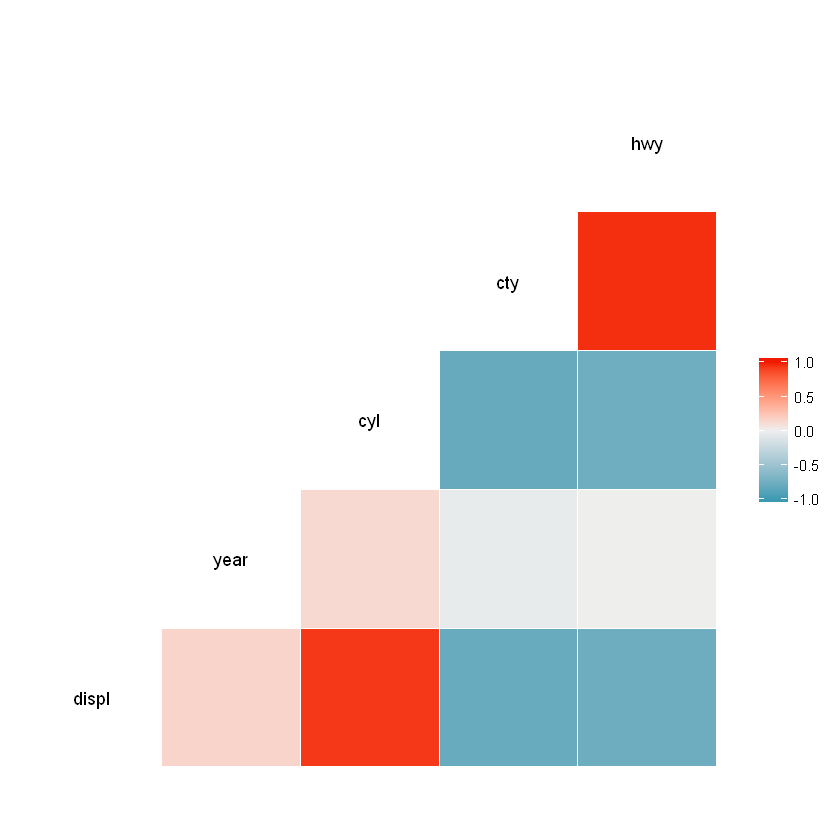

In [4]:
ggcorr(mpg)

It seems that engine displacement (displ) and highway mileage (hwy) have a strong negative correlation. This seems like an interesting trend to visualize! Plotting these two variables against each other will tell us if there's a trend to engine efficency and allow us to further explore the large negative correlation these two variables apparently have.
To do so, we can use ggplot2.
To start a plot in ggplot2, all we have to do is call the ggplot function and pass in the dataset.

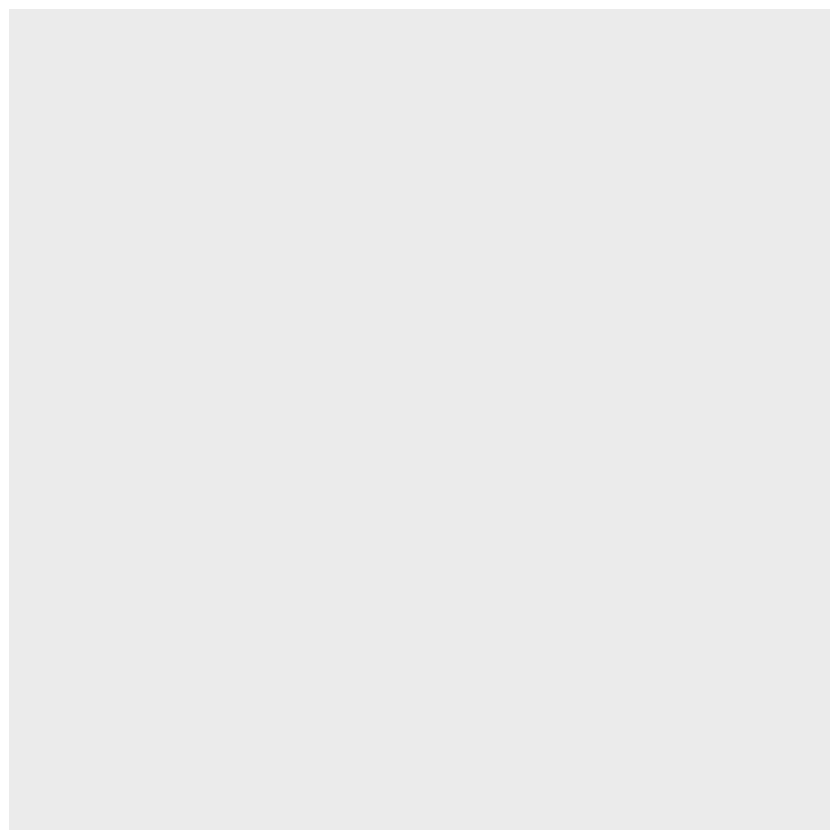

In [5]:
ggplot(data=mpg)

This graph is blank – you haven’t specified what the x and y labels should be nor what kind of graph you want to draw.
We can see how engine displacement relates to mileage using a scatter plot.
To make a scatterplot, we first have to tell ggplot which variables to map to the axes. These are the ‘aesthetics’ of the graph and are referenced by the aes() function.


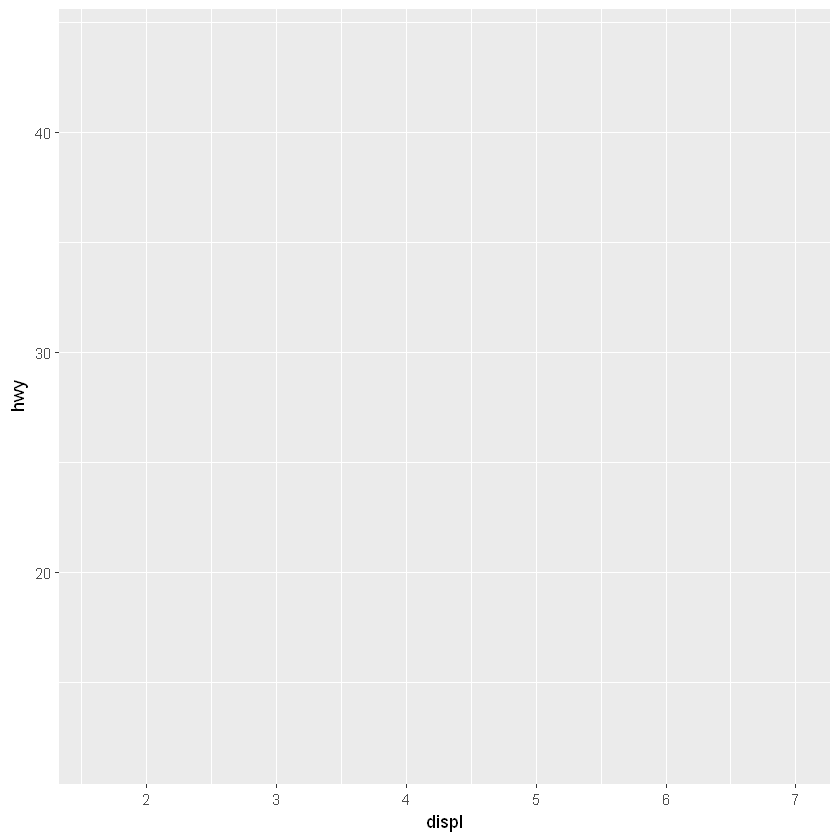

In [6]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy))

Now that our axes are set, we want to add points to make this a scatter plot. We do this by adding a geom – specifically, a point geom.

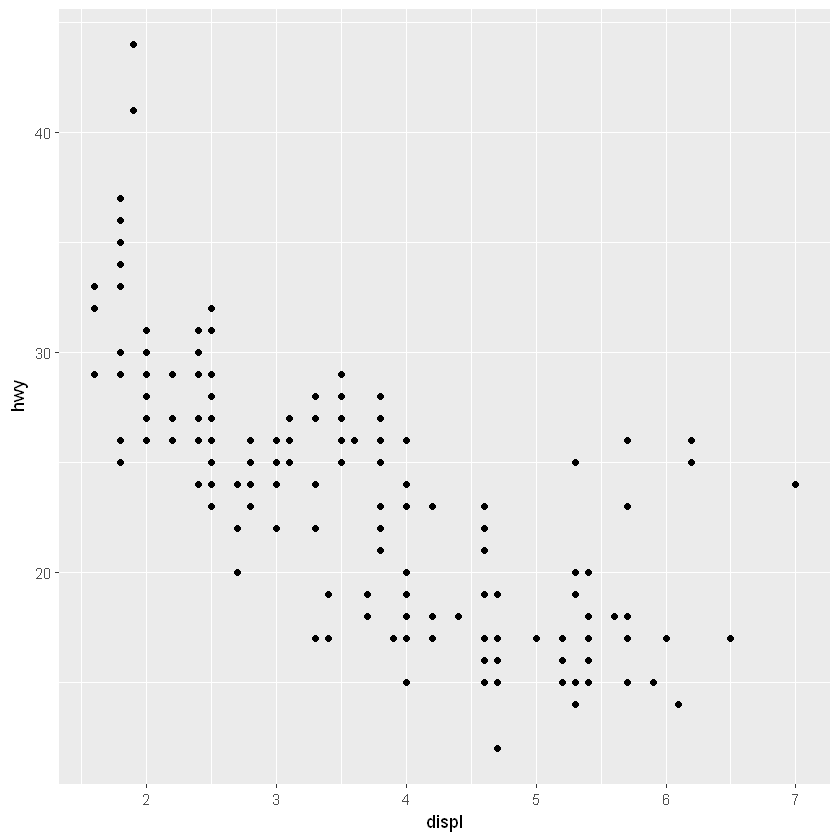

In [7]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
 geom_point()

Very roughly, we see that as engine displacement increases, miles go down. Fantastic!
Suppose, however, we wanted to see if the class of the car affected this. Thankfully, we can map more aesthetics onto this graph.
Let’s take a look at colour.

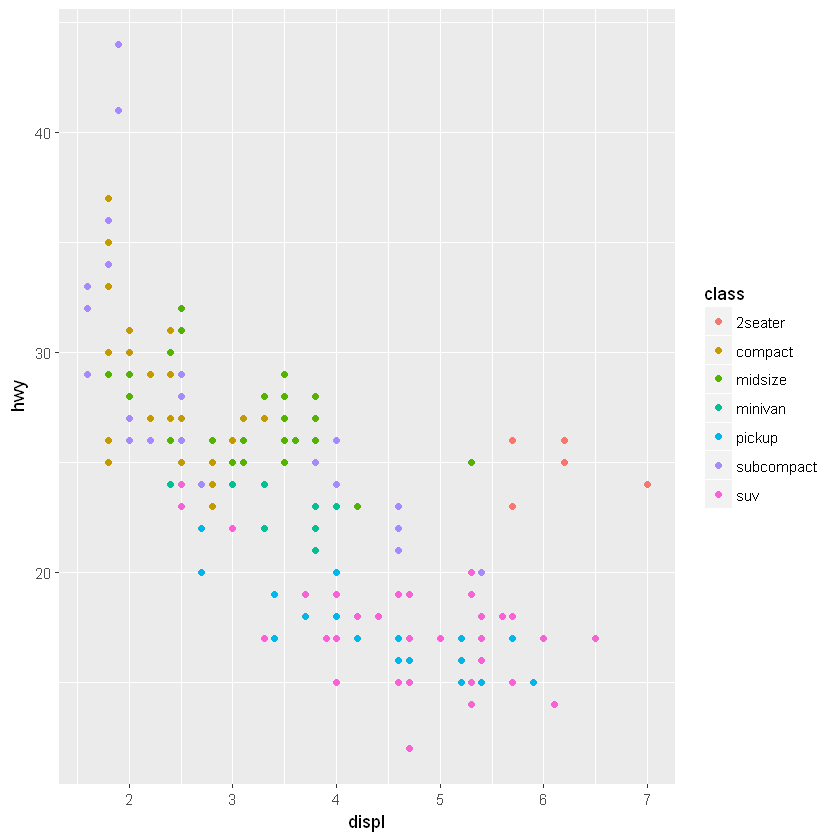

In [8]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy, colour=class)) + geom_point()


We can see the trends better this way. 2-seaters seem to be the outlying group. Compact cars are more efficient than SUVs and large cars.
We can ask another question: do engines that displace more have more cylinders? He can answer this question by mapping cylinders to another aesthetic – size.

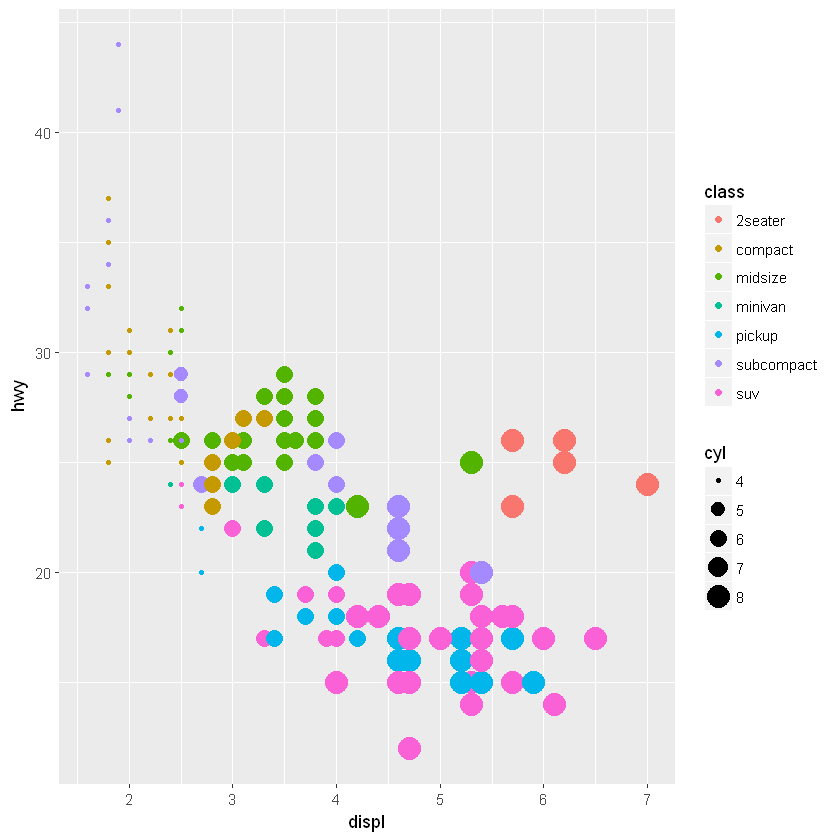

In [9]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy,colour=class, size=cyl)) +
     geom_point()

Somewhat dramatically shown on this diagram, the answer is a resounding yes. For now, let’s remove the size aesthetic and focus on other aesthetics – we’ll get back to talking about size later. 
For example, let’s try to map cylinders to alpha instead.

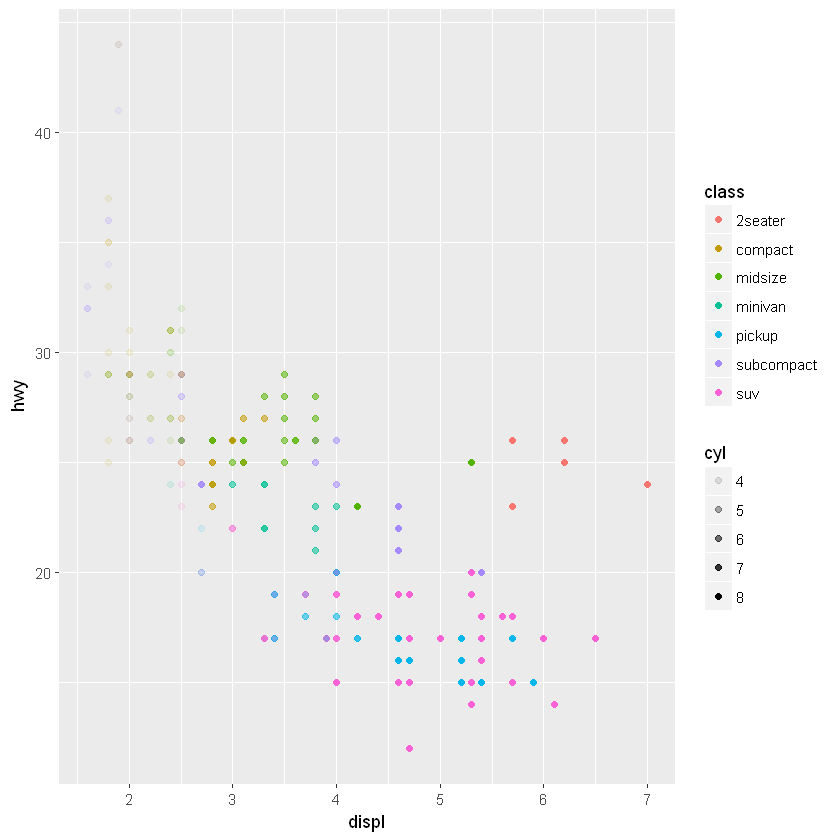

In [10]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy,colour=class, alpha=cyl)) +
         geom_point()


Okay… not particularly useful, but now you see how alpha determines the transparency of a point. We’ll get back to more practical uses of alpha later in this tutorial.
Let’s suppose we wanted to see if the type of drive the car had was significant to its fuel economy. We can map this attribute to shape.

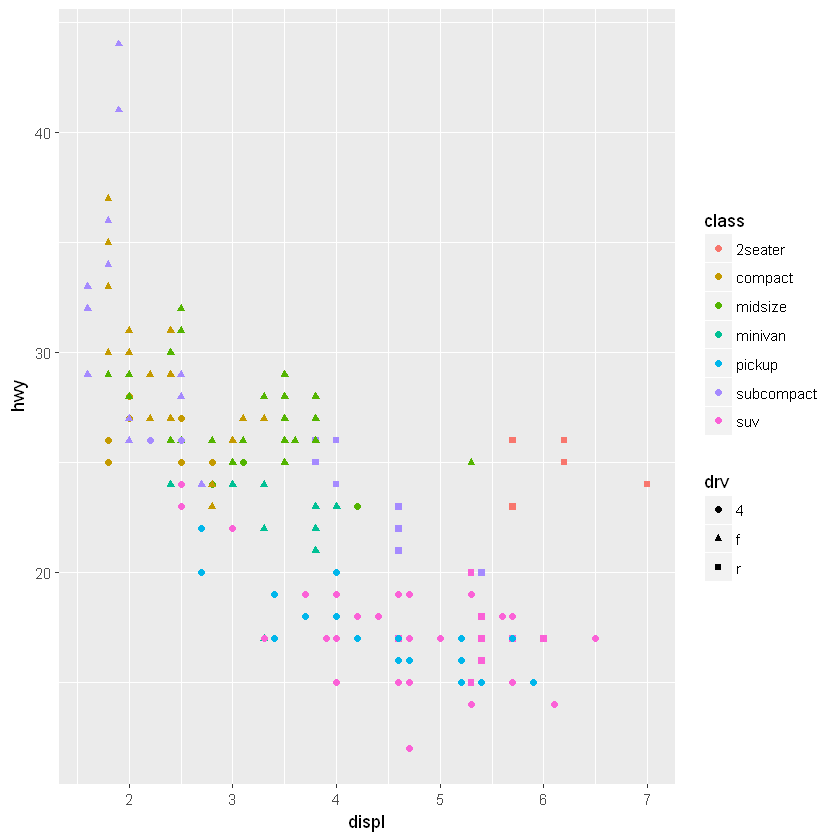

In [11]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy, color=class, shape=drv)) +
      geom_point()


How we see that front wheel drive tend to be more fuel efficient than rear wheel drivers and four wheel drives.
Now that we have a nice graph, let’s explore aesthetics more closely.
Right now, we’ve mapped a discrete variable to colour – that is, a variable with a set amount of values. GGplot maps a unique colour to each variable. Let’s try mapping a continuous variable, cty, to it instead.

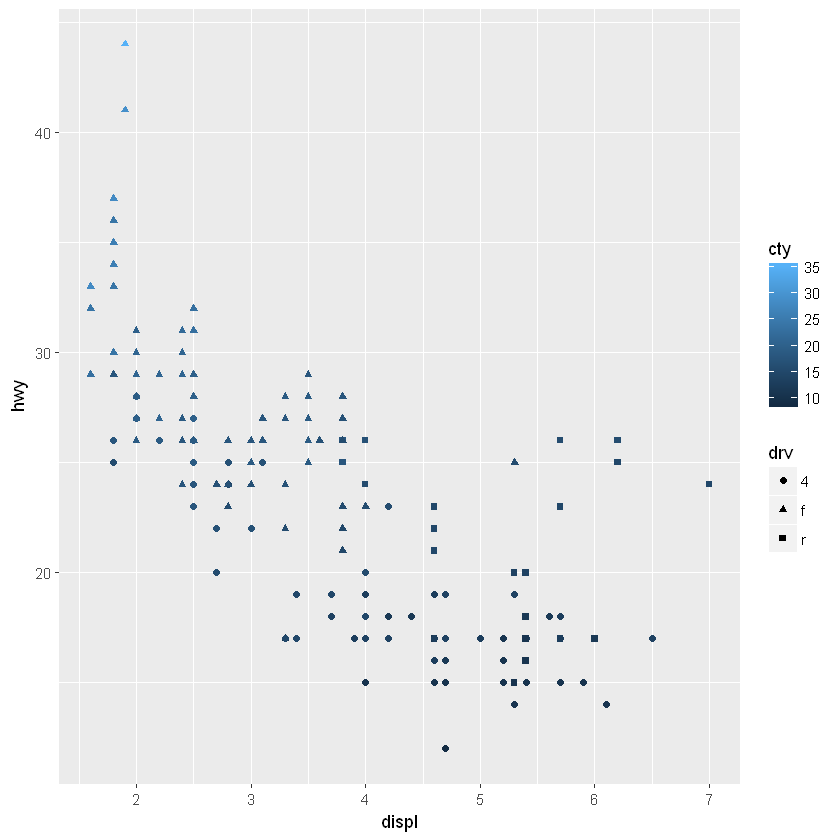

In [12]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy, color=cty, shape=drv)) +
 geom_point()

It creates a gradient!
Try mapping cty to shape as well.

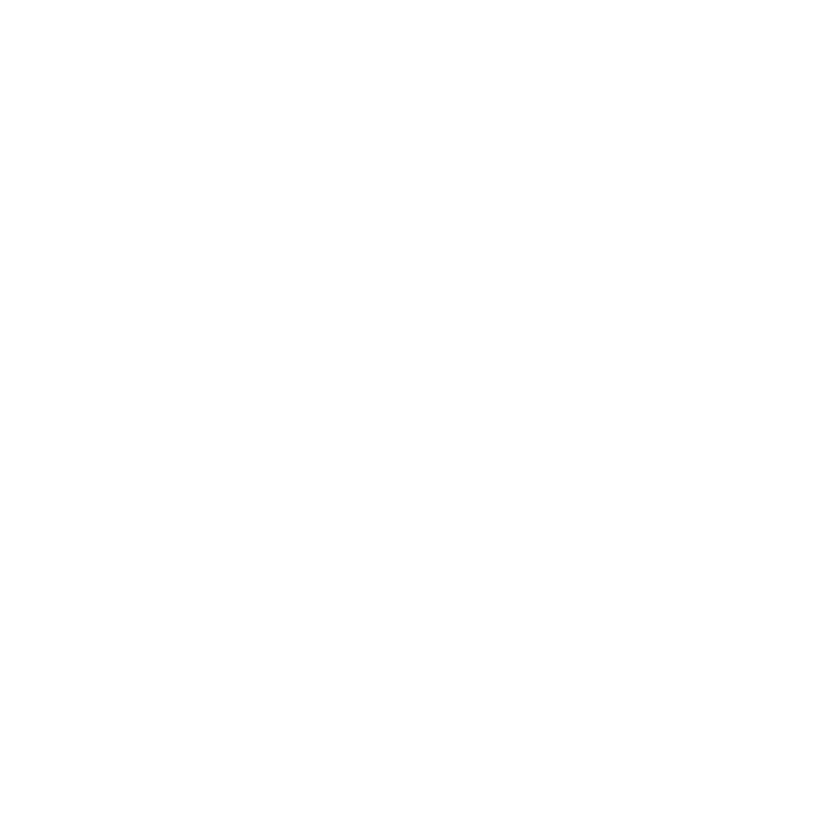

In [13]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy, color=cty, shape=cty)) +
 geom_point()

Error: A continuous variable can not be mapped to shape.
Since there are only so many distinct shapes, continuous variables, which can have infinite values, cannot be mapped to shape.
Okay, so instead try to map class to shape.

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 62 rows containing missing values (geom_point)."

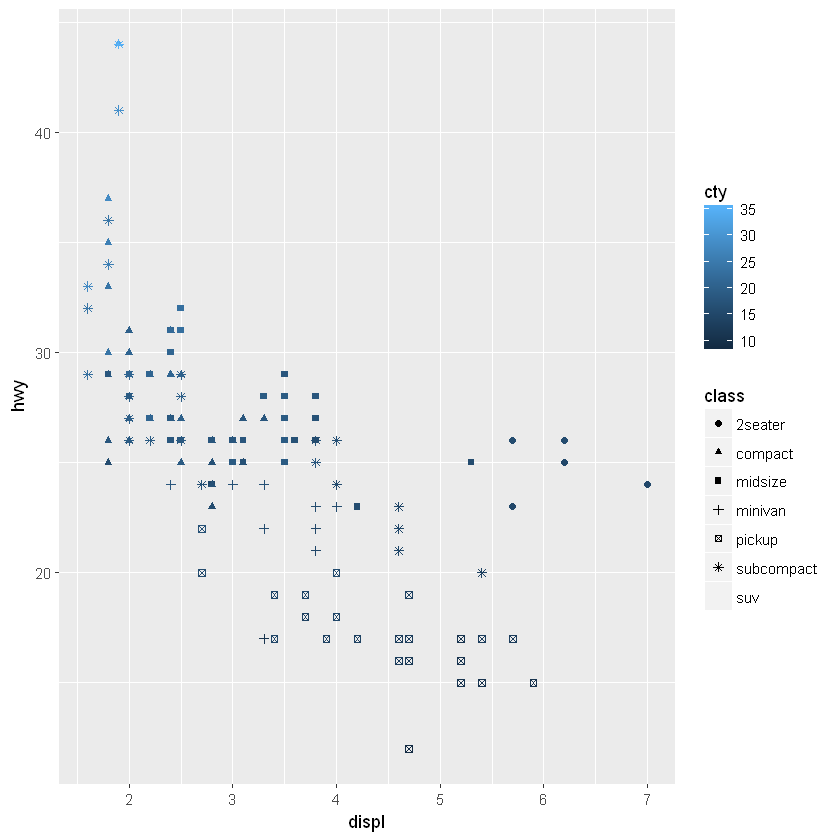

In [14]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy, color=cty, shape=class)) +
 geom_point()

Since we could only map 6 variables onto the shape aesthetic, the extra variable - in our case the SUV class - was removed. Keep this in mind if you want to work with shapes.
How about size?  Let’s replace our colour aesthetic with a size aesthetic.

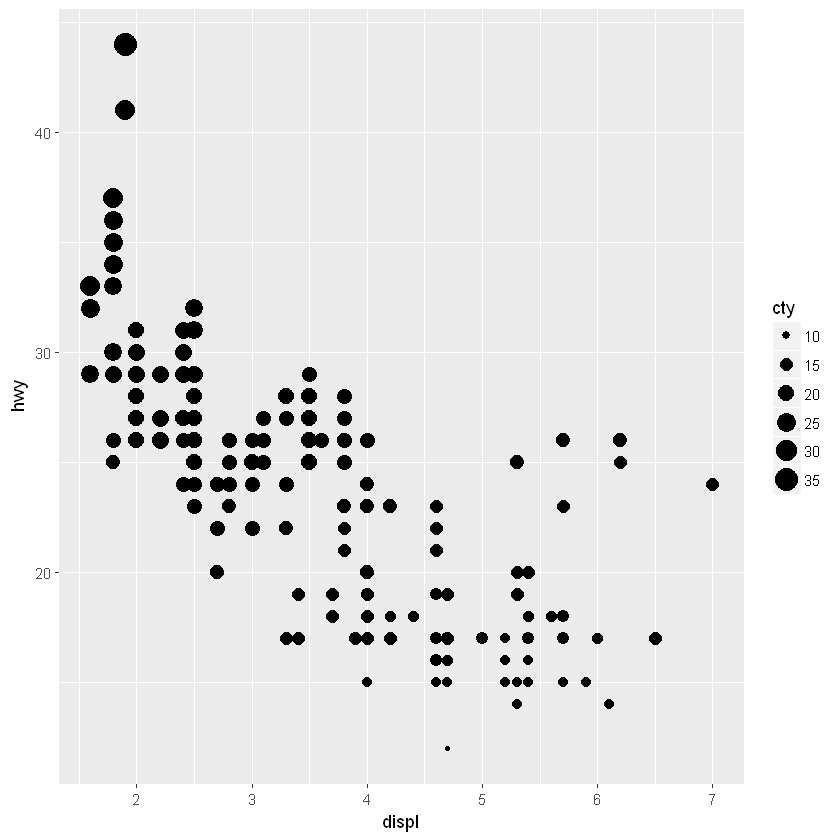

In [15]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy, size=cty)) +
 geom_point()

It’s visible that the larger the highway mileage, the larger the city mileage – a correlation. Size tends to be more useful when mapped to continuous variables because it gives another way to scale.
We now have tools to make the most of our individual points.
However, it might be useful to see the general trend in the graph.
Go back to 

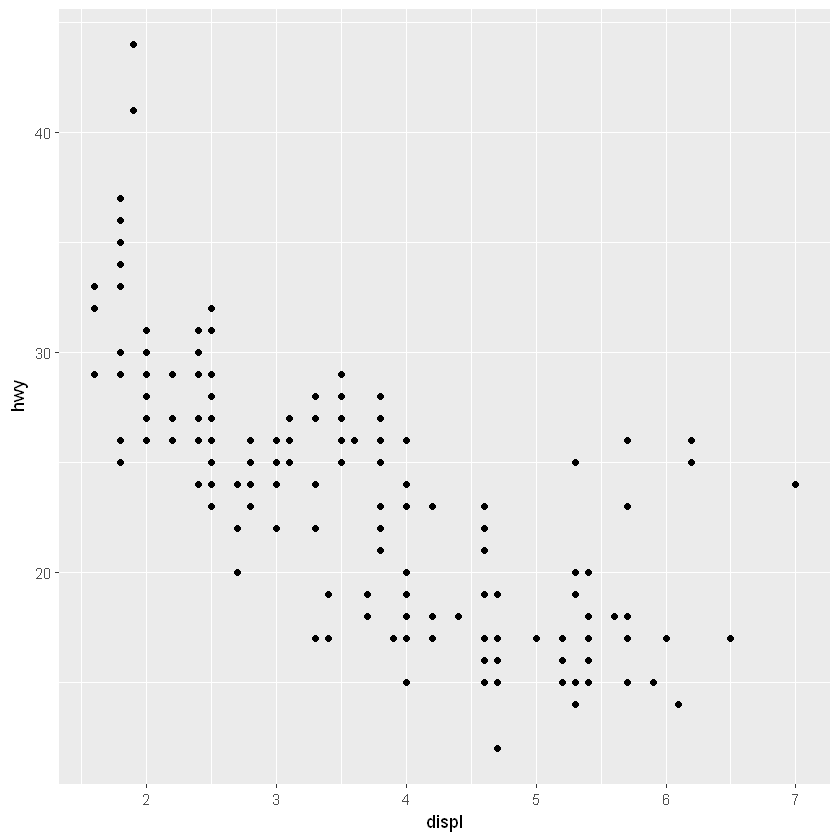

In [16]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
 geom_point()

Just by eyeballing this we can see the trend. To visualize this, we can use another geom: smooth.

`geom_smooth()` using method = 'loess'


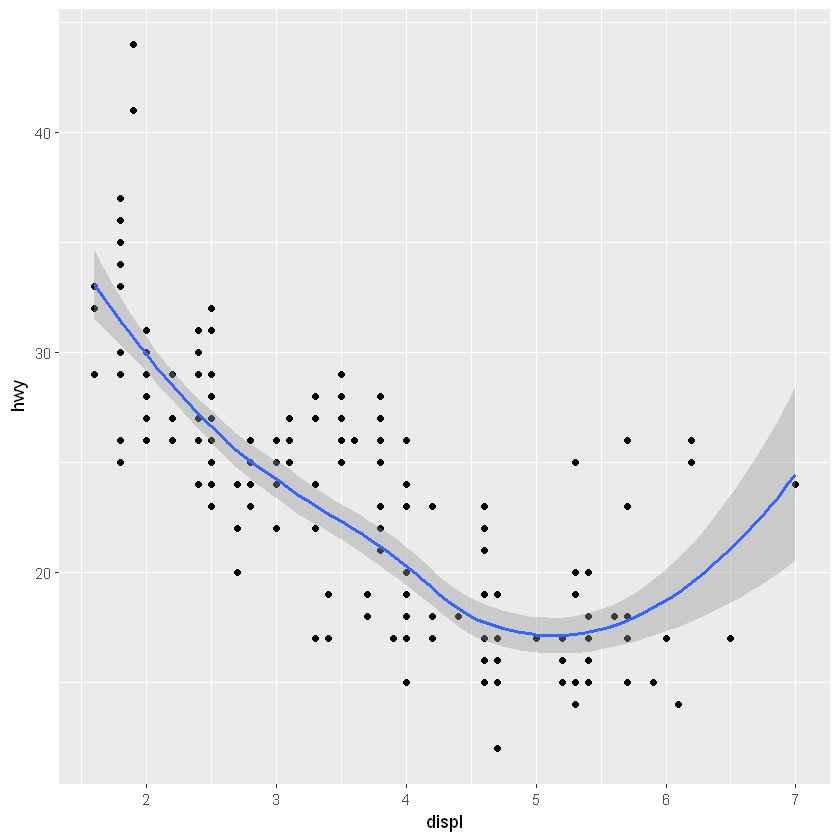

In [17]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
     geom_point() +
     geom_smooth()

Don’t worry about the message in red – this is just telling you the algorithm used to generate the line, since we didn’t specify anything. Loess is used in small datasets because while being very useful it is also very inefficient. 

You can change the algorithm with the 'method' parameter. For example, 'lm' will give you linear regression. 

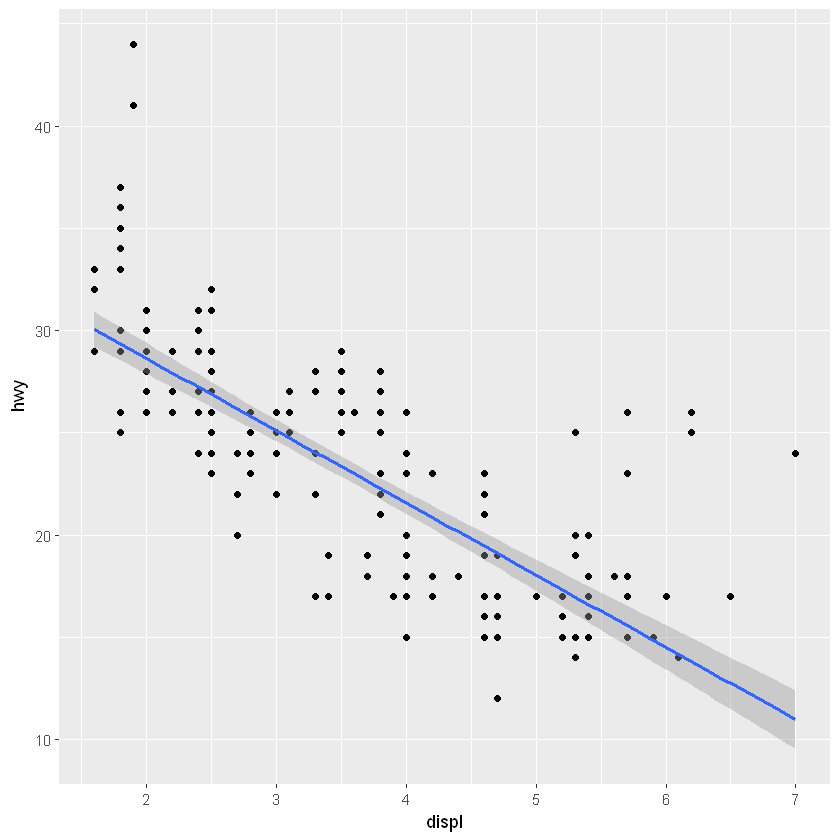

In [18]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
     geom_point() +
     geom_smooth(method = lm)

Linear regression will more accurately portray the strong negative correlation we saw in the correlation matrix. 

You'll learn more about linear regression in Week 3 - Machine Learning.

Let's us it to try to visualize this general trend on top of coloured points. Add in the colour aesthetic to the, map it to class, and add the smooth line.

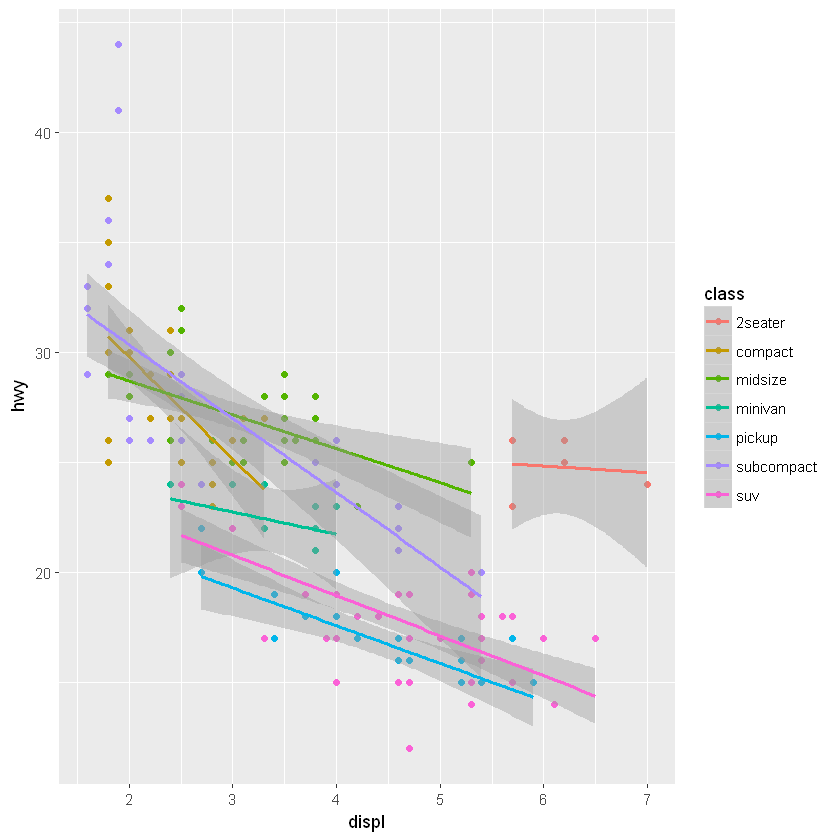

In [19]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy, colour=class)) +
     geom_point() +
     geom_smooth(method ='lm')

Uh-oh. This is looking a lot messier. Instead of one line describing the trend for every data point, we now have multiple lines describing the trend of each class. This can be useful, but it’s not what we wanted.
We can fix this by moving the aesthetics from ggplot to the point geom. This makes the aesthetics local to the geom, meaning they only affect that geom.
Since the axis will remain the same, we only have to move the colour aesthetic. To move it, simply add in a mapping parameter in the form of a colour aesthetic, and remove the colour aesthetic from the ggplot(). 

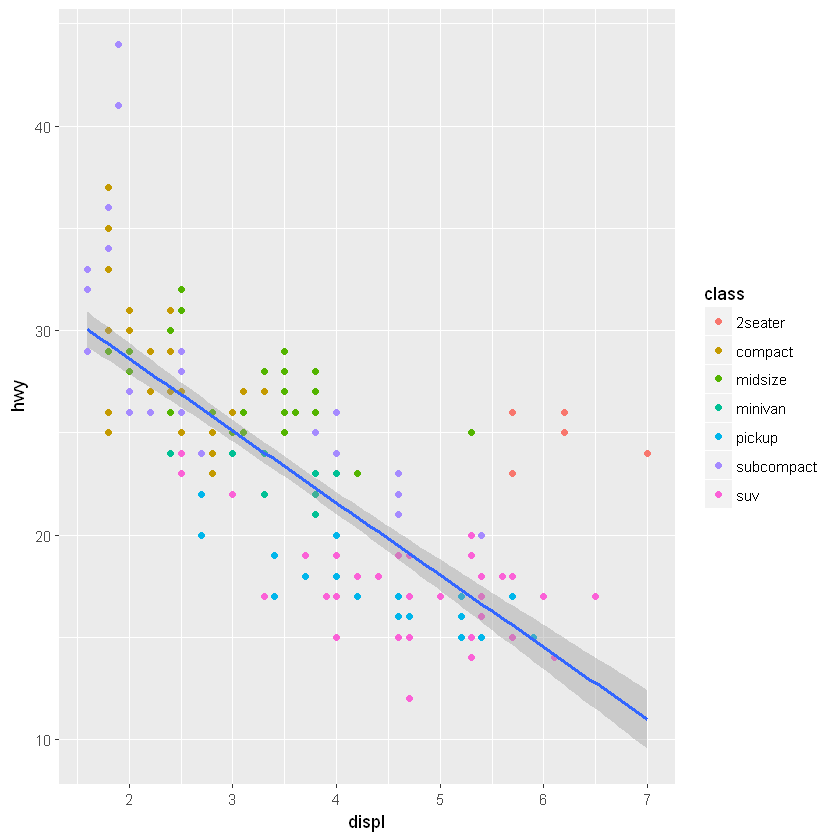

In [20]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
     geom_point(mapping=aes(colour=class)) +
     geom_smooth(method = 'lm')

You may have noticed something odd in our graph: even though there are 234 entries in the dataset, there seem to be a lot fewer points on our chart.

This is an example of something called *overplotting*. Overplotting generally happens when values get rounded – for example, if the car really displaced 5.15 litres, it might be rounded to 5.2, along with cars which actually displaced 5.23 or 5.21 litres. This causes the points to be drawn onto each other, making it seem like there are fewer points than there actually are. This can cause misleading visualizations that don’t quite reflect the trend.

There are a few ways to prevent this. One simple solution is to lower the alpha of all the dots, so those with multiple points appear darker.

(Note - alpha must be passed in on the layer, or local level)

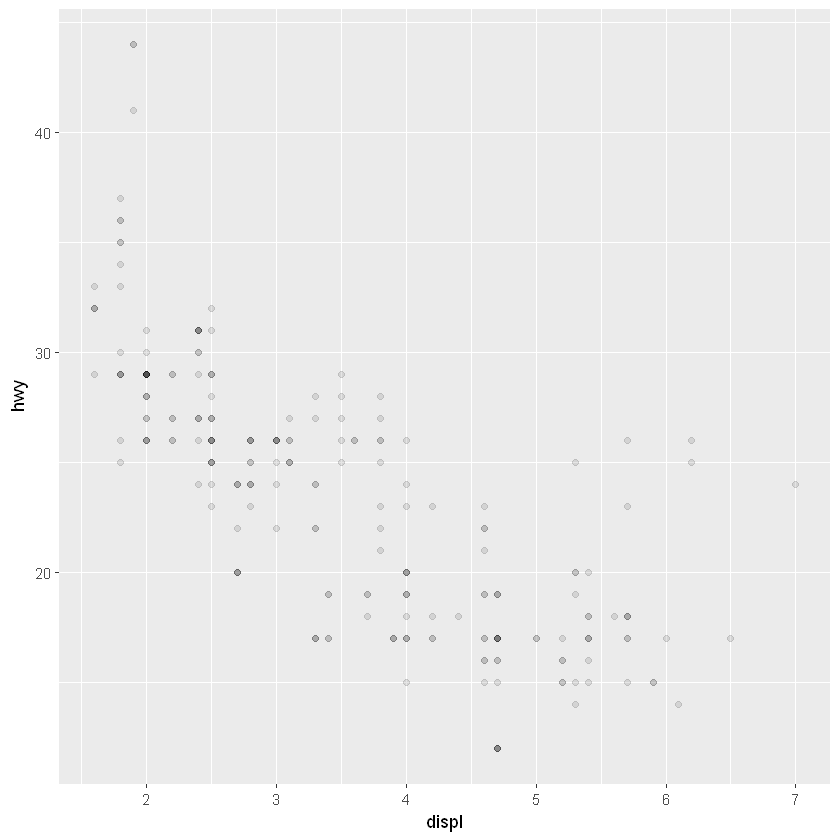

In [21]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
         geom_point(alpha=.1)

This solution doesn’t work very well with our dataset due to its small size, but you can see that the general trend is shown a little more visibly.

What if we can represent the more ‘popular’ joints of the graph by size? GGplot2 comes with a tool for this – a geom called count. Try replacing the geom_point with geom_count.

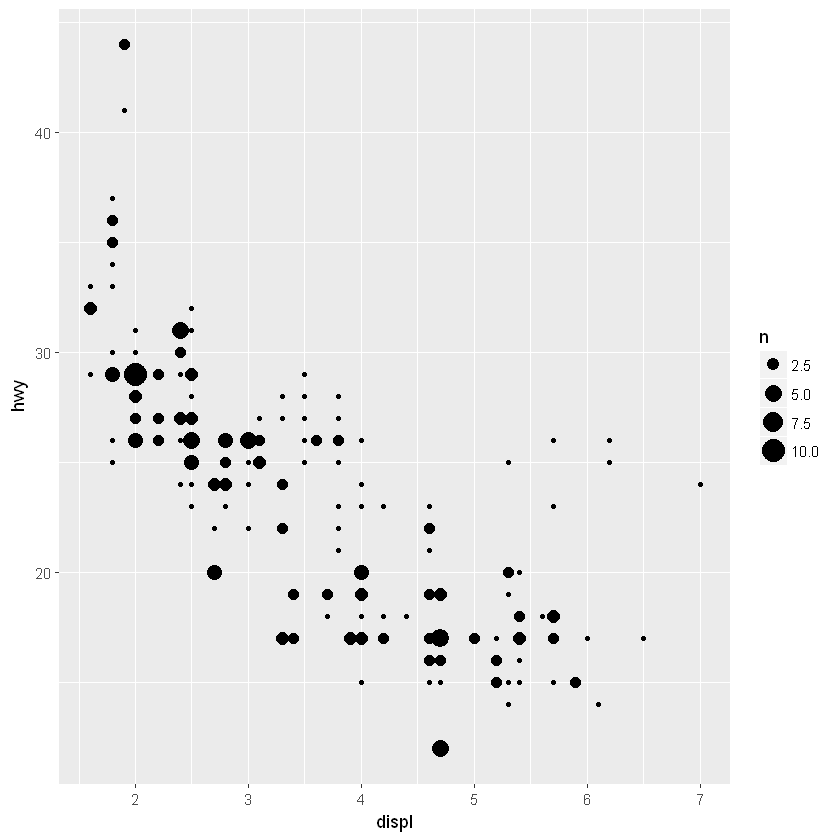

In [22]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
         geom_count()

Another way to deal with overplotting is to apply jitter. Jitter is adding random noise to your graph so that the points are shifted slightly to lessen overlap. 

To apply jitter to a point geom, use the position parameter. Setting the position parameter to jitter will add in the random noise. Make sure you do this to the geom itself.

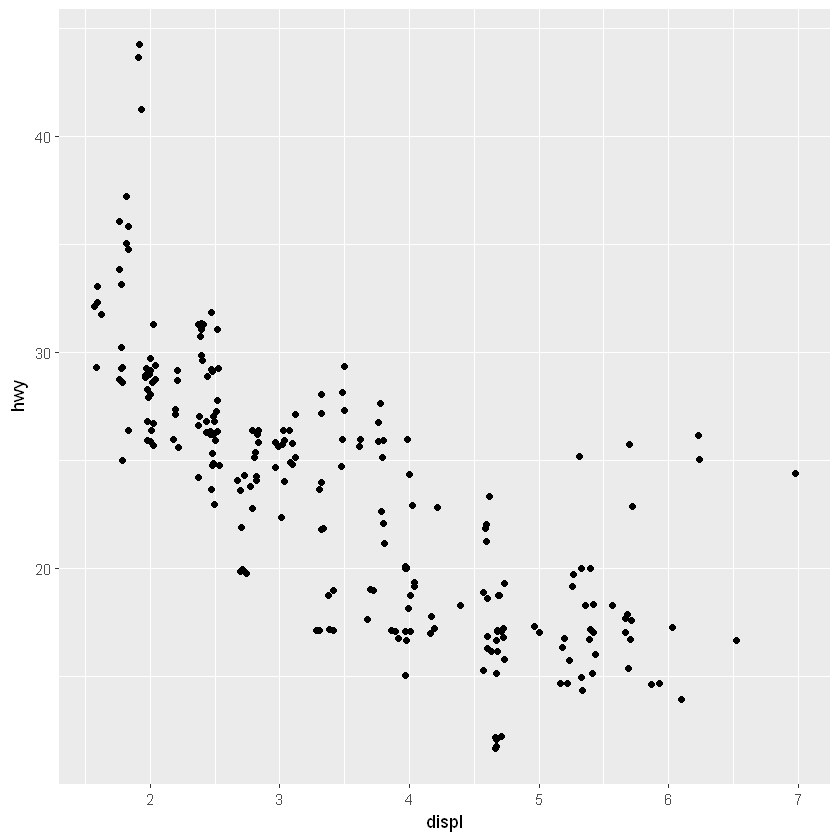

In [23]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
        geom_point(position="jitter")


To adjust how much the graph is jittered by, use the position jitter function to set values for height (vertical jitter) and width (horizontal jitter). Be careful not to make them too high, though, or you will risk losing clarity. 

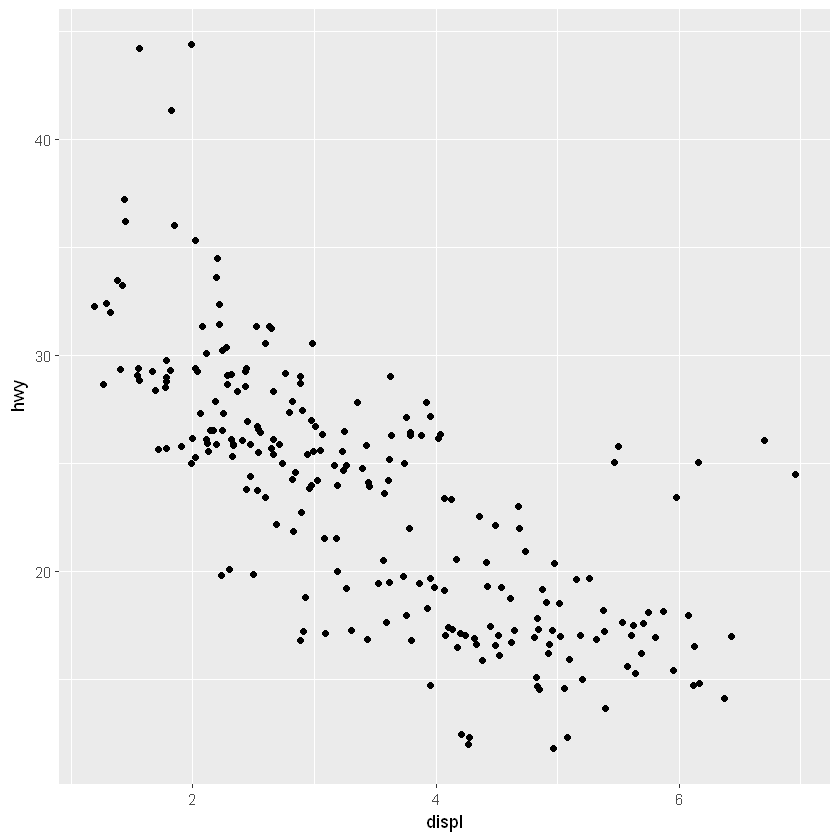

In [24]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
         geom_point(position=position_jitter(.5,.5))

Note that since the jittering is random, running this function can give a variety of results. Your graph will might not look like mine. 

Your points should look more scattered, however.
Jittering and scatterplots go hand in hand so often that R has a geom for jittered points: geom_jitter.

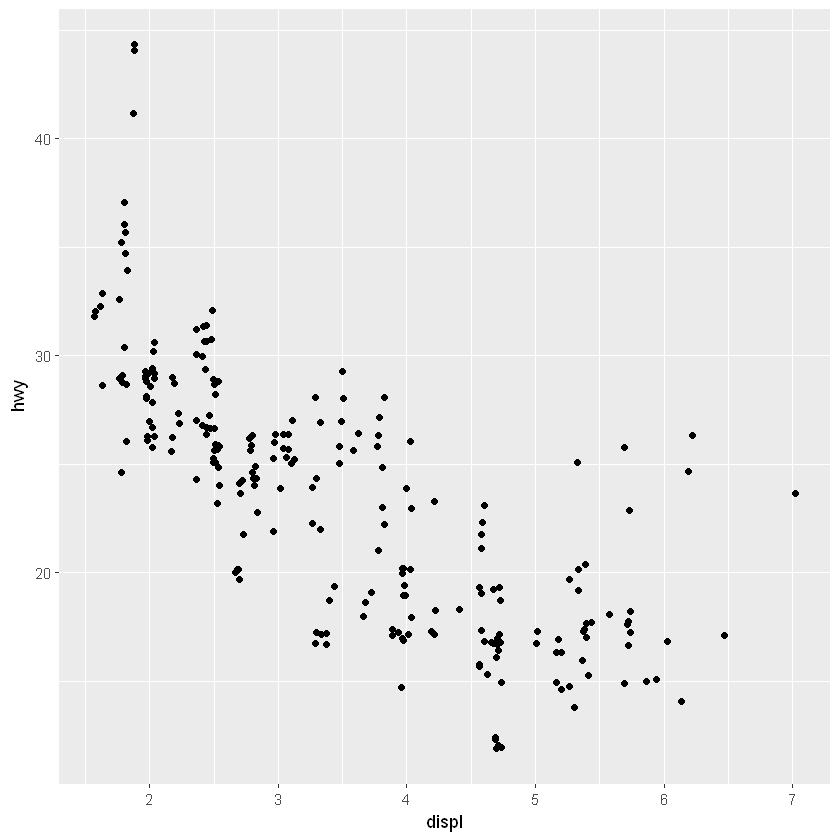

In [25]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
         geom_jitter()

You can modify the jitter height and width on the geom directly.

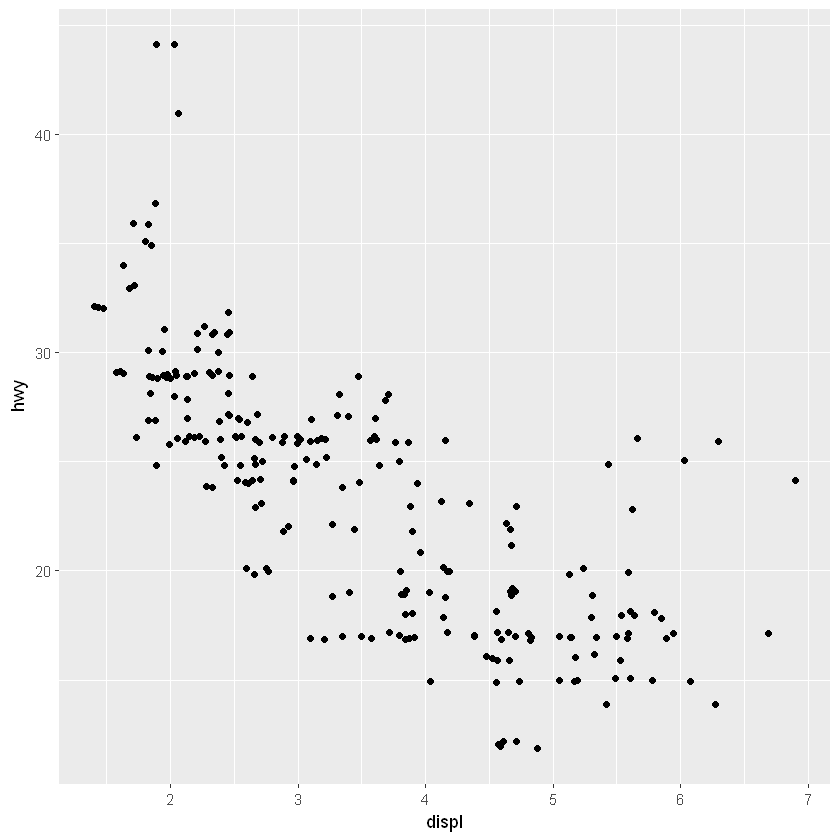

In [26]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
         geom_jitter(width=.2, height=.2)

So! We’ve discovered new geoms. Thankfully, ggplot2 comes with a lot of different geoms, not just points for scatterplots. 
We’ve explored the relationship between engine displacement and mileage rather well. These are two continuous variables – let’s try to investigate how plotting other variable combinations will work.
Let’s suppose we wanted to know how many cars there were of each class. We can visualize this using the bar geom – just by mapping class to the x variable.

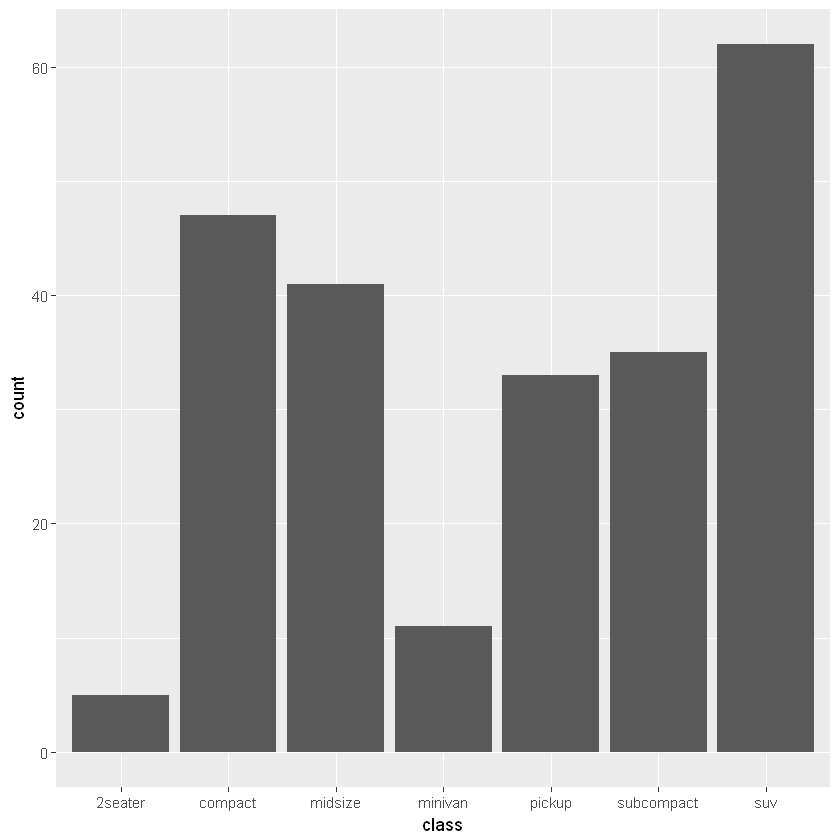

In [27]:
ggplot(data=mpg, mapping = aes(x=class)) +
         geom_bar()

Note that we didn’t specify a y mapping – instead, it seemed to generate one itself. Count is a statistical transformation, or stat. It is the result of a function which tallied up the cars under each category of class. 
Like with point, we can map more aesthetics onto this. Let’s try adding colour in to represent drive.

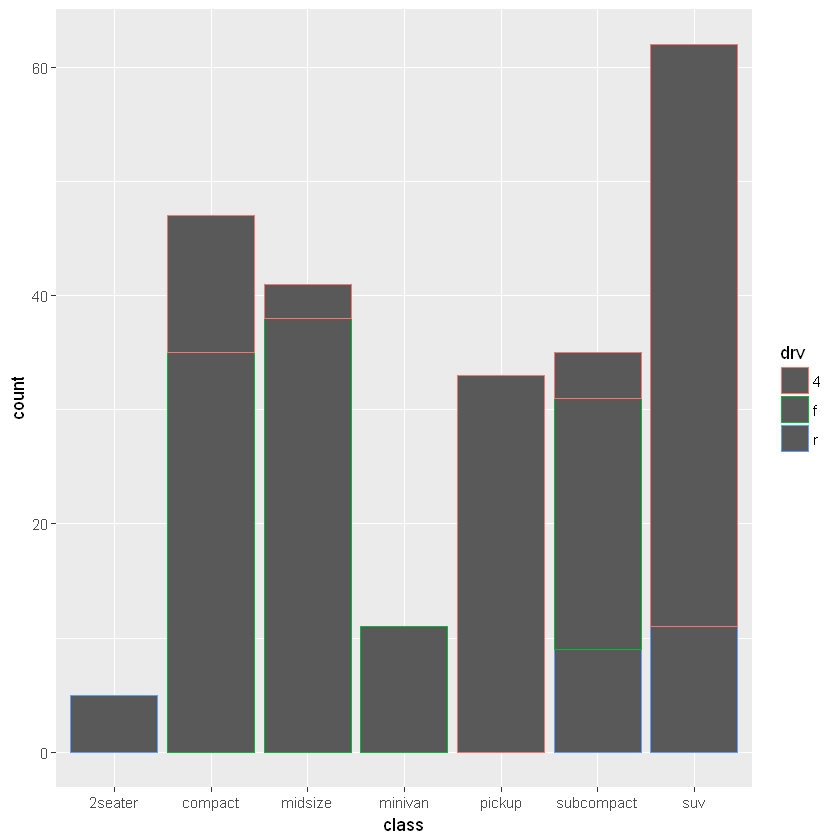

In [28]:
ggplot(data=mpg, mapping = aes(x=class)) +
         geom_bar(mapping=aes(colour=drv))

Okay… this is not very useful. We can see the proportions as outlines, but it’s not exactly clear. We can fix this by mapping drive to the fill aesthetic.

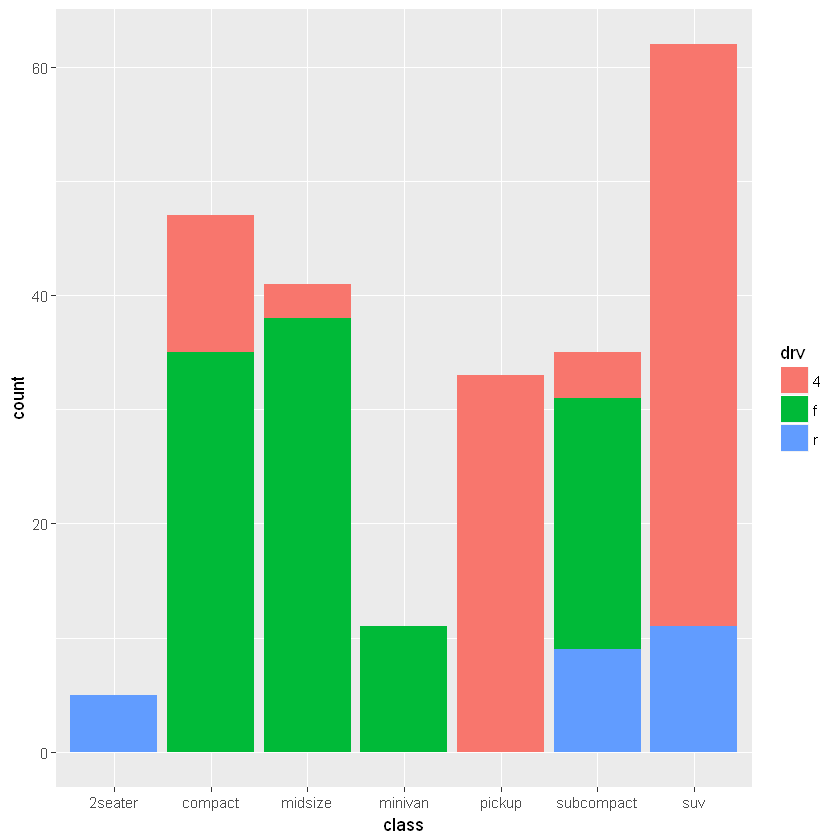

In [29]:
ggplot(data=mpg, mapping = aes(x=class)) +
         geom_bar(mapping=aes(fill=drv))

That’s better! Note how the colours are all stacked onto each other. This is called a stacked bar chart.
There are other ways we can visualize this relationship with the help of the position parameter.
Setting the position to identity makes it so the coloured segments aren’t stacked on top of each other, but simply plotted over each other.

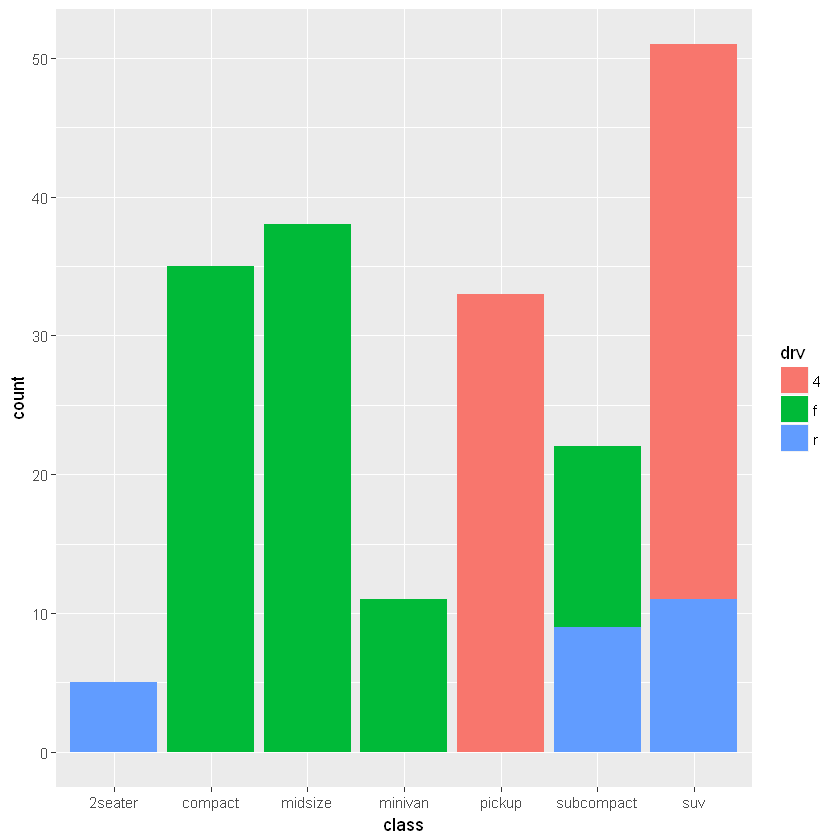

In [30]:
ggplot(data=mpg, mapping = aes(x=class)) +
         geom_bar(mapping=aes(fill=drv), position="identity")

Since this is hiding some data, we should make the fill transparent. You could also change the alpha levels, but this can end up looking unclear.
Set fill to NA. Remember to apply this to all bars – that is, set this outside of the aesthetics function.

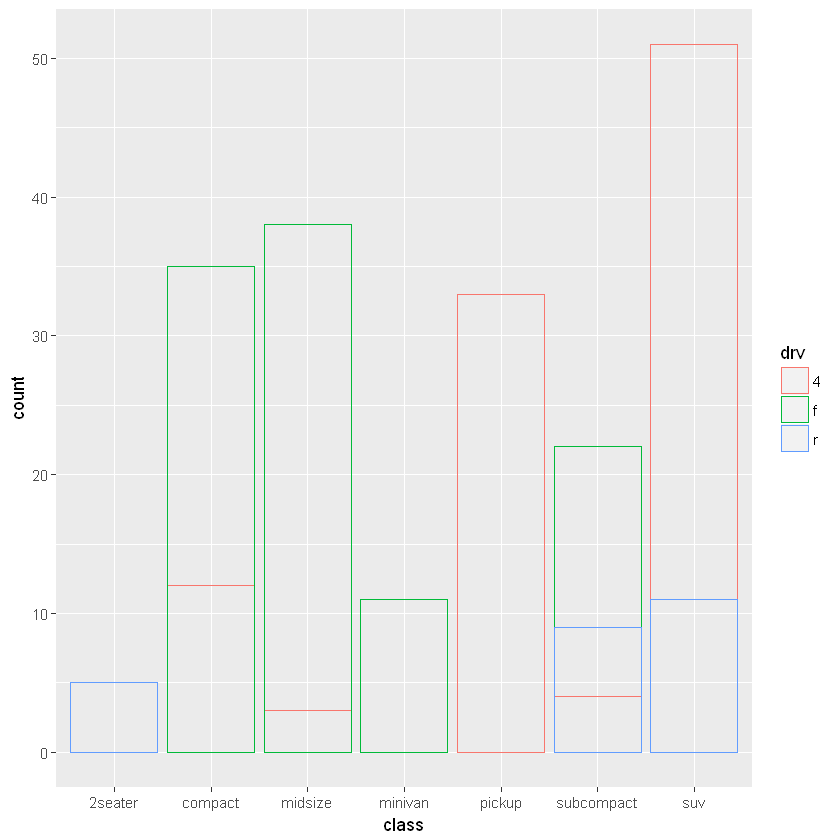

In [31]:
ggplot(data=mpg, mapping = aes(x=class)) +
         geom_bar(mapping=aes(color=drv), fill=NA,  position="identity")

Instead of using identity, we can use ‘fill’ to give us a clearer sense of proportions.

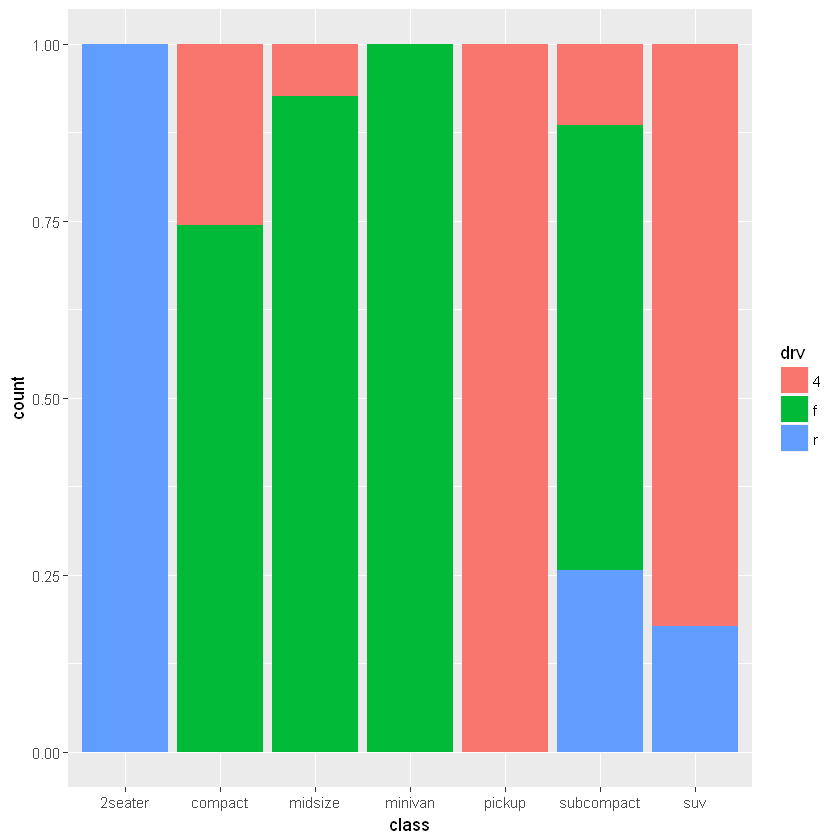

In [32]:
ggplot(data=mpg, mapping = aes(x=class)) +
        geom_bar(mapping=aes(fill=drv), position="fill")

Sometimes being able to contrast is the most desirable option. We can achieve this with the dodge position.

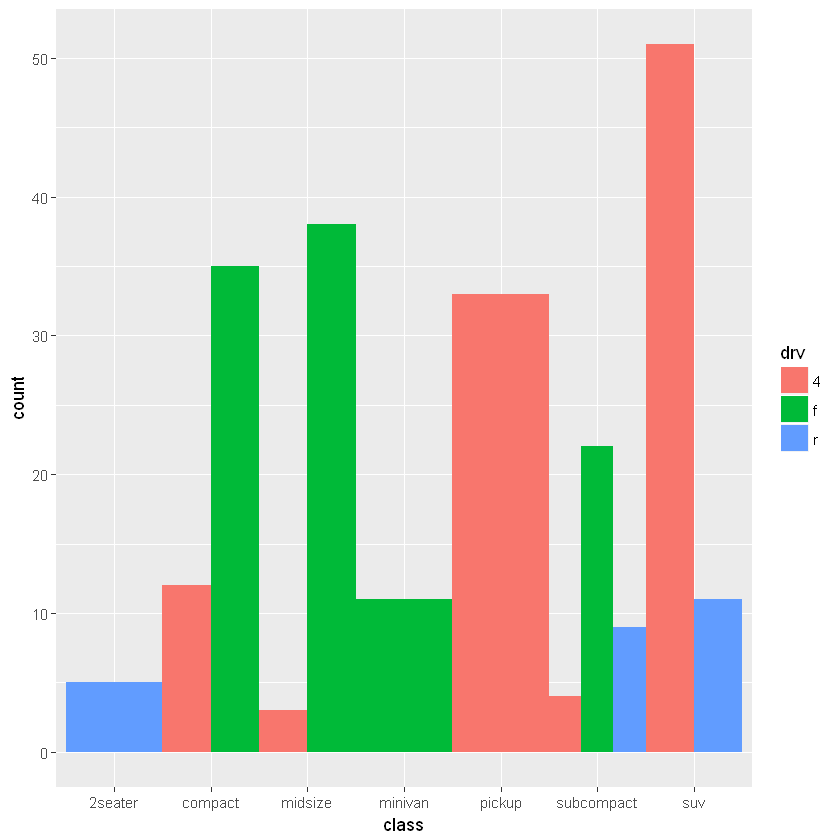

In [33]:
ggplot(data=mpg, mapping = aes(x=class)) +
         geom_bar(mapping=aes(fill=drv), position="dodge", width=1)

Geom_bar works for discrete variables on the x axis. To work with continuous variables, you might want to use geom_density or geom_histogram.
Try generating a histogram to visualize city miles.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


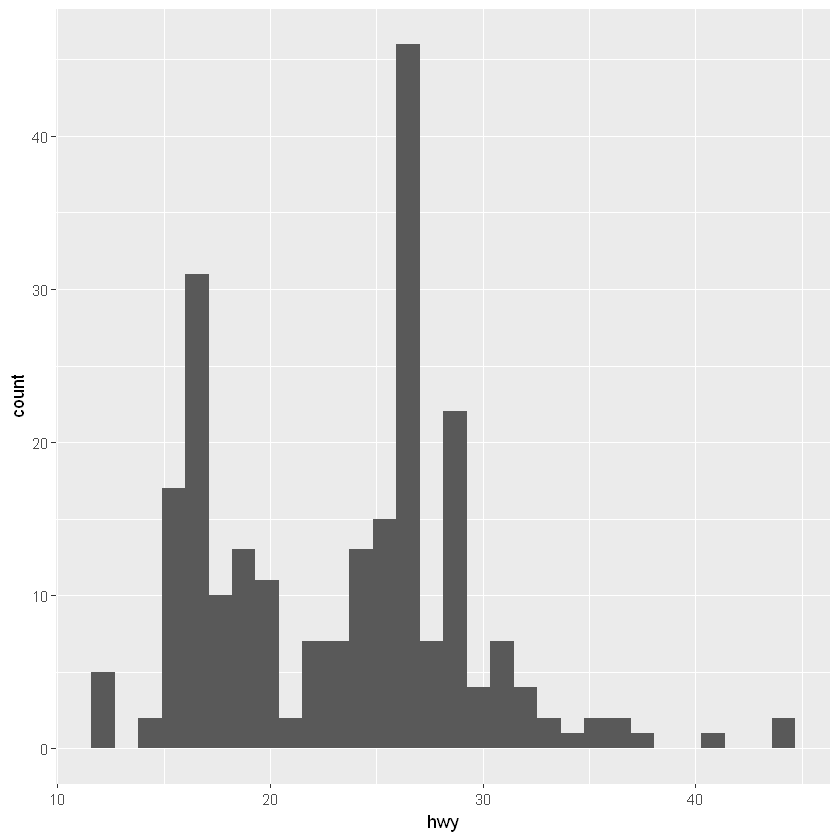

In [34]:
ggplot(data=mpg) + geom_histogram(aes(x=hwy))

Notice that a warning pops up.
Continuous variables are grouped into ‘bins’, or ranges, and the count of each of those bins are plotted. You can change the range of the bins with binwidth, or the number of bins with bins.
Try setting the bin parameter to 1.

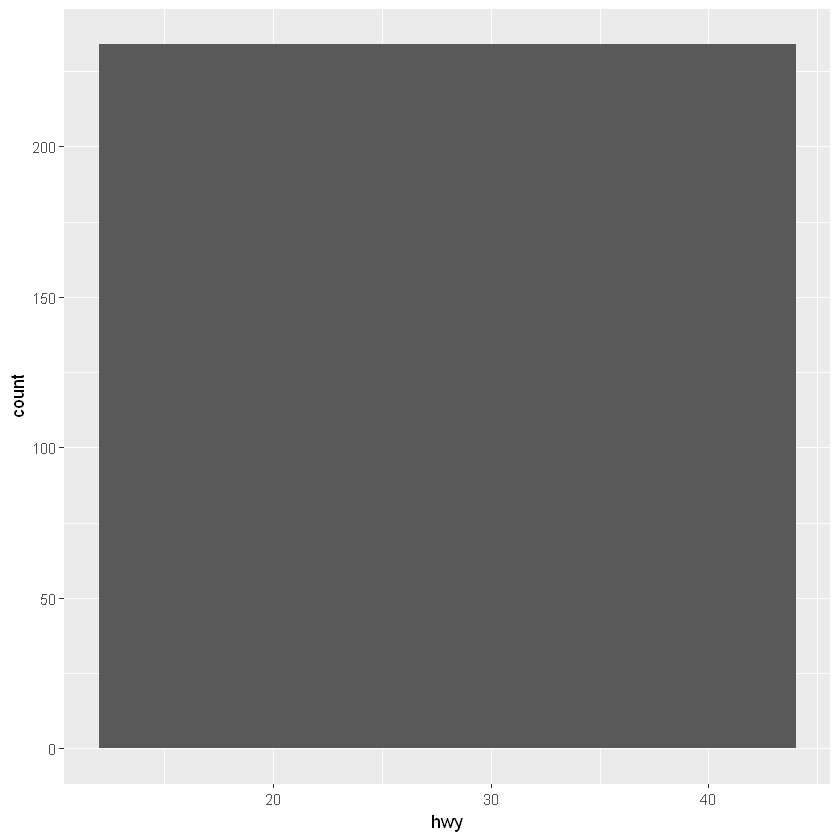

In [35]:
ggplot(data=mpg) + geom_histogram(aes(x=hwy), bins=1)

Now, try setting binwidth to 1. Note the difference.

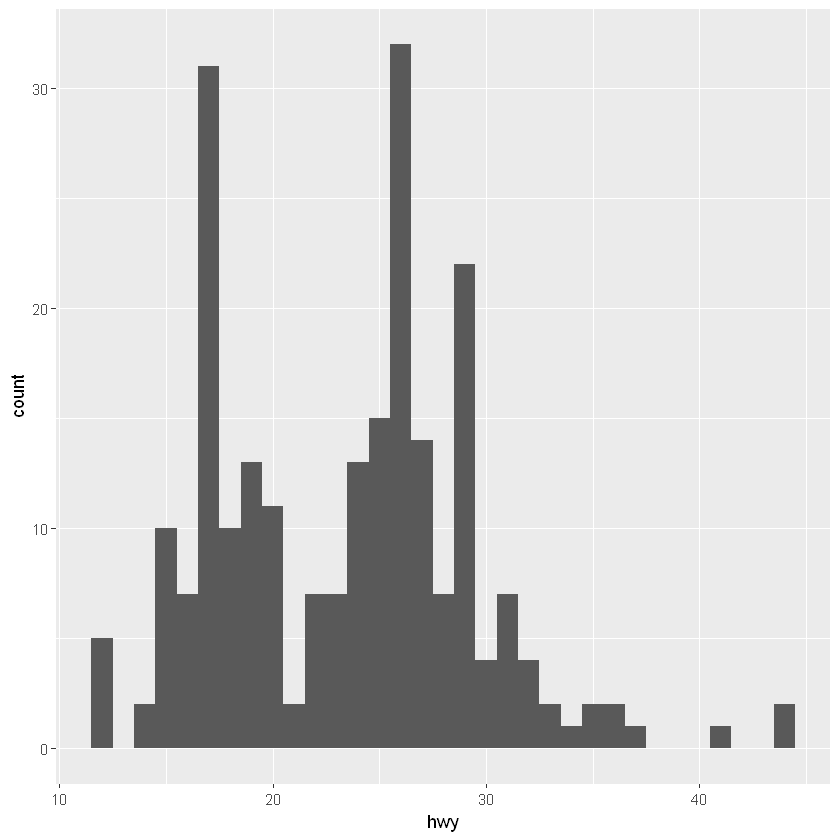

In [36]:
ggplot(data=mpg) + geom_histogram(aes(x=hwy), binwidth=1)

As for two variables, we saw a few geoms to handle two continuous ones – jitter, point, and smooth.
You could also use text to replace points with labels containing data.

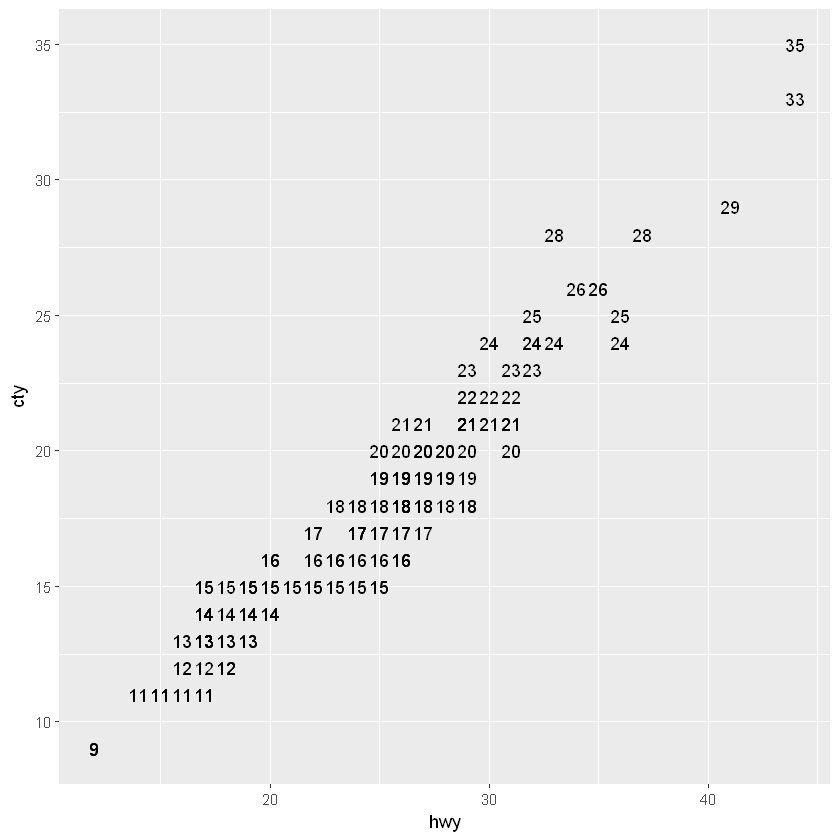

In [37]:
ggplot(data=mpg) + geom_text(aes(x=hwy, y=cty, label=cty))

To plot a quantile regression, you can use the quantile geom.

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve

Smoothing formula not specified. Using: y ~ x


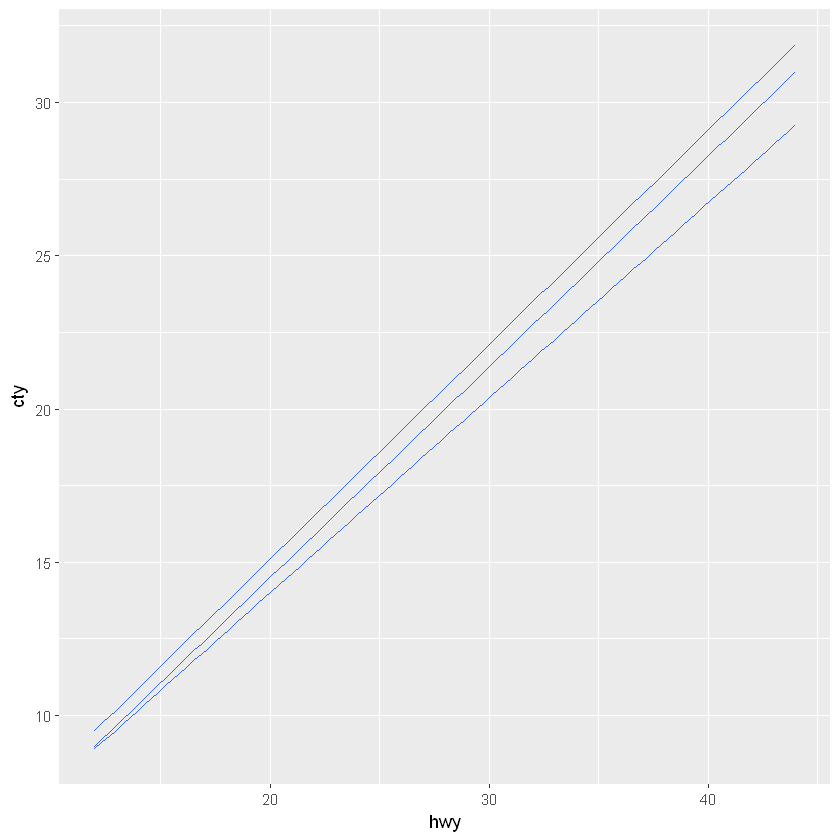

In [38]:
ggplot(data=mpg) + geom_quantile(aes(x=hwy, y=cty))

Don’t worry about the red text for now. You’ll learn more about regression in later workshops.
If we want to visualize trends with two continuous variables as well as look at their count, we might want to use the hex geom.


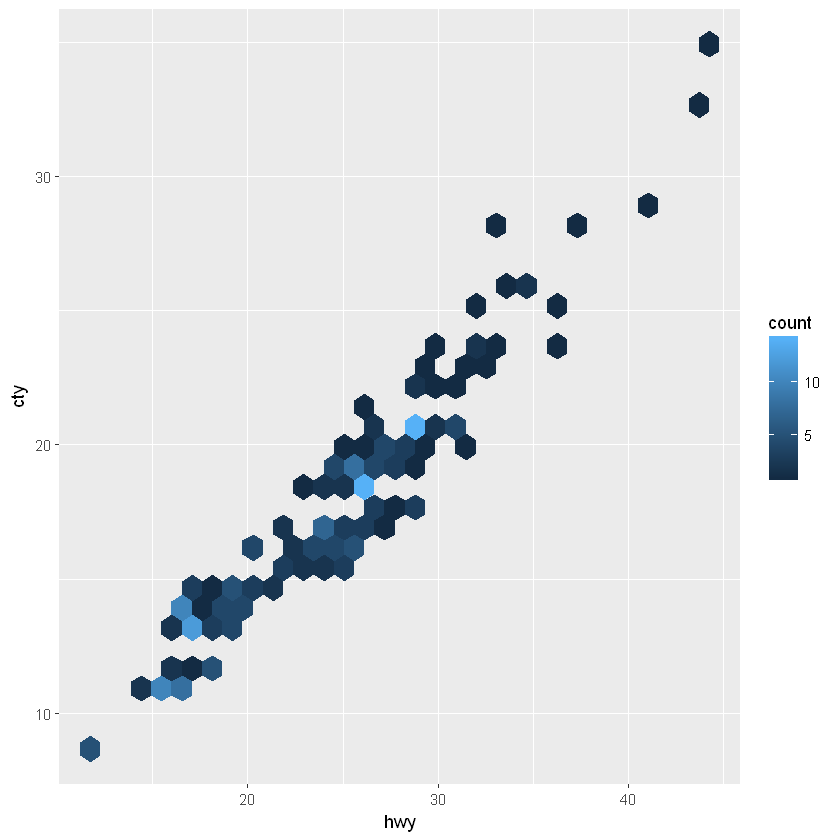

In [39]:
ggplot(data=mpg) + geom_hex(aes(x=hwy, y=cty))

If we wanted to plot a discrete variable and a continuous variable together, a good option would be the boxplot.

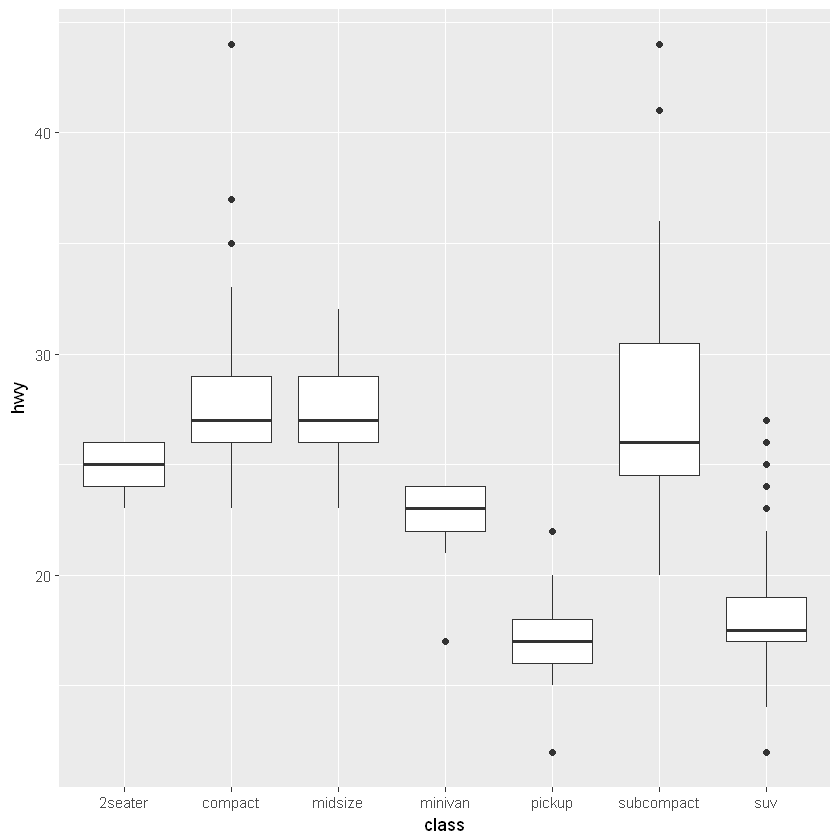

In [40]:
ggplot(data=mpg) + geom_boxplot(aes(x=class, y=hwy))

Note that the outliers are plotted as their own separate points.
If we wanted to include these outliers with proportional representation, we could use the violin plot.


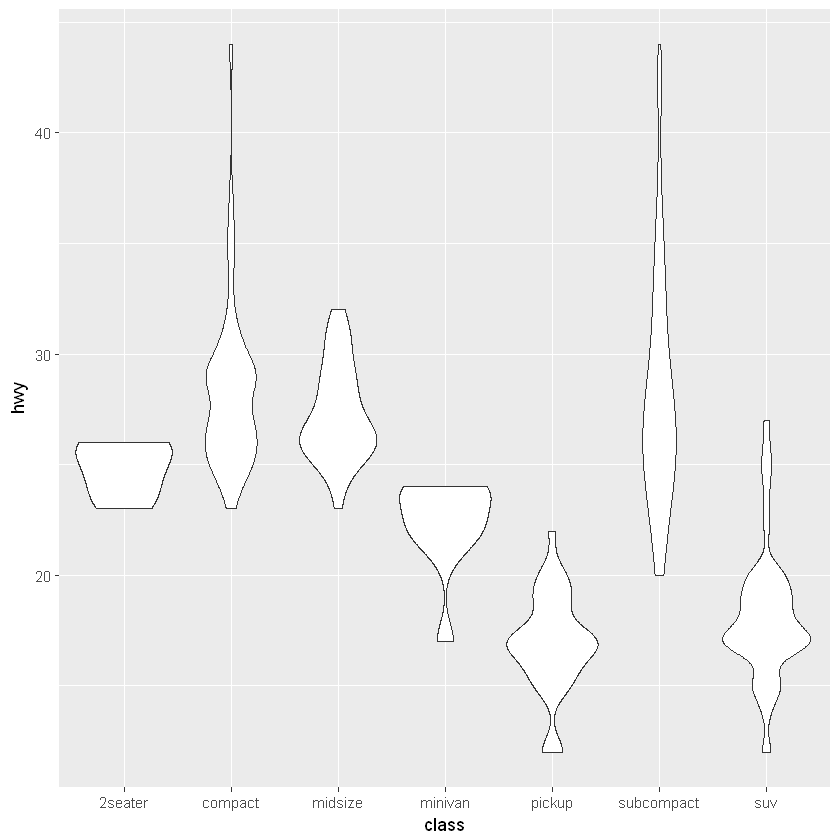

In [41]:
ggplot(data=mpg) + geom_violin(aes(x=class, y=hwy))

For the above graph, it might be useful to see where the mean of the data lies – the ‘centre’ of the shape. We can do this by layering on a stat (a data transformation) called stat_summary.

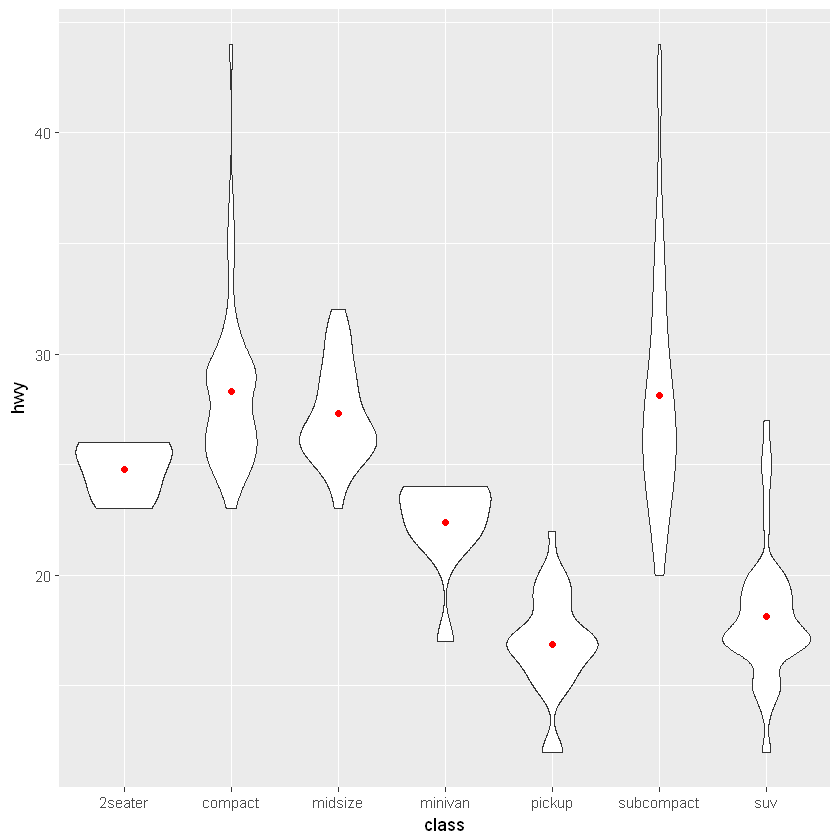

In [42]:
ggplot(data=mpg, mapping=aes(x=class, y=hwy)) + 
     geom_violin() + 
     stat_summary(fun.y=mean, color="red", geom="point")


Notice how the fun.y took a parameter (in our case, mean) and plotted that.
Let’s investigate this stat further with ?stat_summary. Read about the functions, and note how there are four: 
-	fun.y, which we designated to mean average in our previous plot. It took all the values of each class, averaged them, and plotted the point.
-	Fun.ymax, which, similarly, accepts a function that operates on the values and returns a single numerical value.
-	Fun.ymin, which does the same as the above.
-	Fun.data takes a function that returns a data table with the other values (fun.y, fun.ymax, fun.ymin).

Stat_summary will generate these values given the functions you provide it. If there is no function provided, it will use mean_se. Mean_se returns the mean as the fun.y, mean + standard error as fun.ymax, and mean-standard error as fun.ymin.

However, we didn’t use fun.ymax or fun.ymin before. Why is this?

Well, let’s look at our previous code.

Notice that we told the stat that it should use the point geom  to draw. Use ? geom_point to investigate the function and look at its aesthetics. There isn’t a ymin or ymax parameter.

There are in fact geoms we can use that have ymin and ymax parameters. 

We can add an error bar using the error bar geom. Add another stat summary, set the point geom to error bar, and get rid of the fun.y parameter. This should mean that it’ll use the mean_se function to generate fun.y, fun.ymin, and fun.ymax.


No summary function supplied, defaulting to `mean_se()


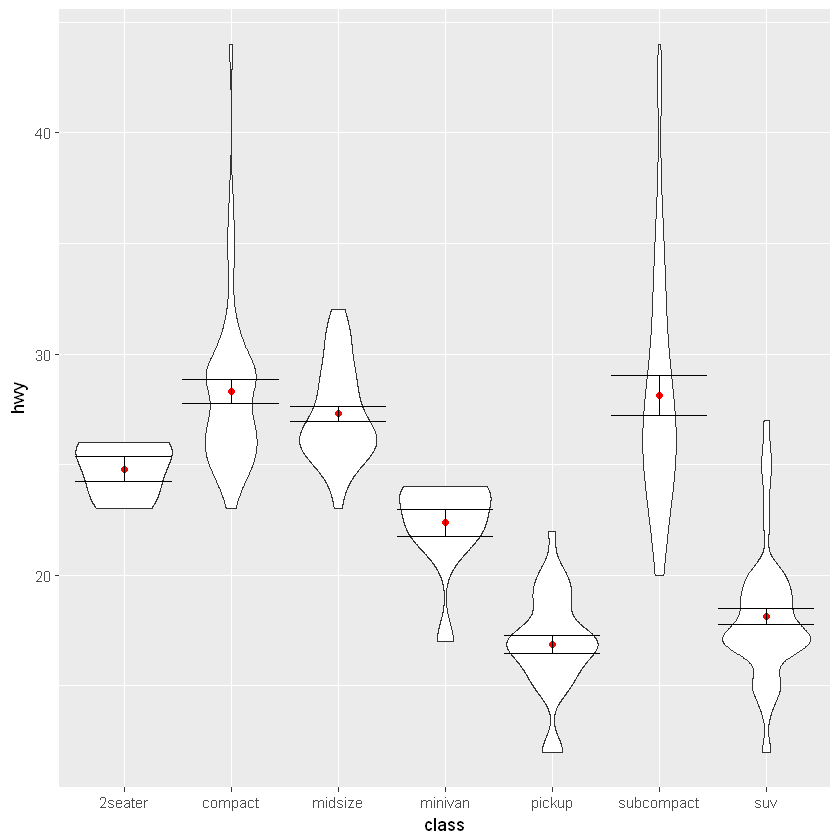

In [43]:
ggplot(data=mpg, mapping=aes(x=class, y=hwy)) + 
     geom_violin() + 
     stat_summary(fun.y=mean, color="red", geom="point")+
     stat_summary(geom="errorbar")


Sure enough, it gives us a warning, telling us it's defaulting to mean_se().

This means that the ranges provided by the error bar are determined by standard error.

But what if we wanted to visualize standard deviation instead of standard error?

Remember that each of the parameters from the error bars can accept functions. We simply have to ‘feed’ each of parameters a function that uses standard error.

To do this, we have to individually set fun.y, fun.ymin, and fun.ymax. Fun.y is easy – it’s just the mean. We already did this: we just have to write fun.y=mean. 

We have to write functions for fun.ymin and fun.ymax, though.

We can pass in a function that operates on the values of each class by writing function(a), where a is the values of each class. In brace brackets after the function, we can describe what the function does.

The bottom reach of the error bar should be one standard deviation from the mean, as should the top. We do this by adding and subtracting the standard deviation from the mean for ymax and ymin, respectively.

Hint: you can calculate the standard deviation of a set of numbers using the sd() function.


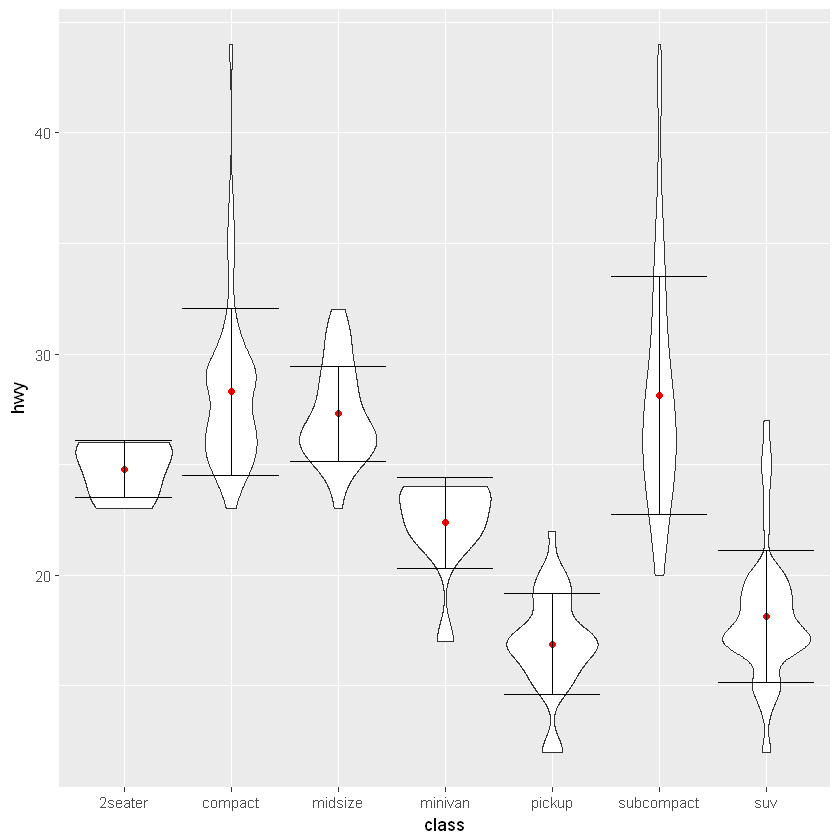

In [44]:
ggplot(data=mpg, mapping=aes(x=class, y=hwy)) + 
     geom_violin() + 
     stat_summary(fun.y=mean, color="red", geom="point")+
     stat_summary(geom="errorbar", 
                  fun.y = mean, 
                  fun.ymin = function(a){mean(a)-sd(a)},
                  fun.ymax = function(a){mean(a)+sd(a)})


Stats and geoms are pretty fluent. If you want to rewrite the previous code as a geom instead of a stat, use the stat parameter in geoms.

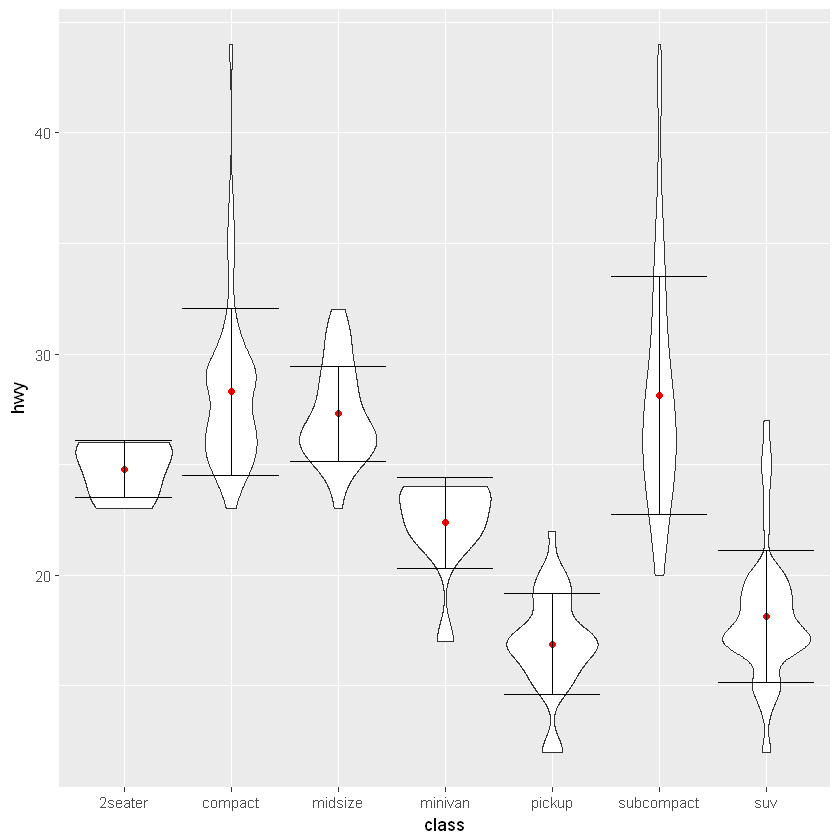

In [45]:
ggplot(data=mpg, mapping=aes(x=class, y=hwy)) + 
     geom_violin() + 
     stat_summary(fun.y=mean, color="red", geom="point")+
     geom_errorbar(stat="summary",
                  fun.ymin = function(a){mean(a)-sd(a)},
                  fun.ymax = function(a){mean(a)+sd(a)})


You can investigate other geoms, such as:
Geom_crossbar
Geom_linerange
Geom_pointrange
Geom_errorbarh (this one has a trick to it!)
Discover which work best for which variable combinations.
    
Let's try to plot an error bar onto a bar plot!
Suppose we wanted to show the error in counting the amount of cars in each class. 

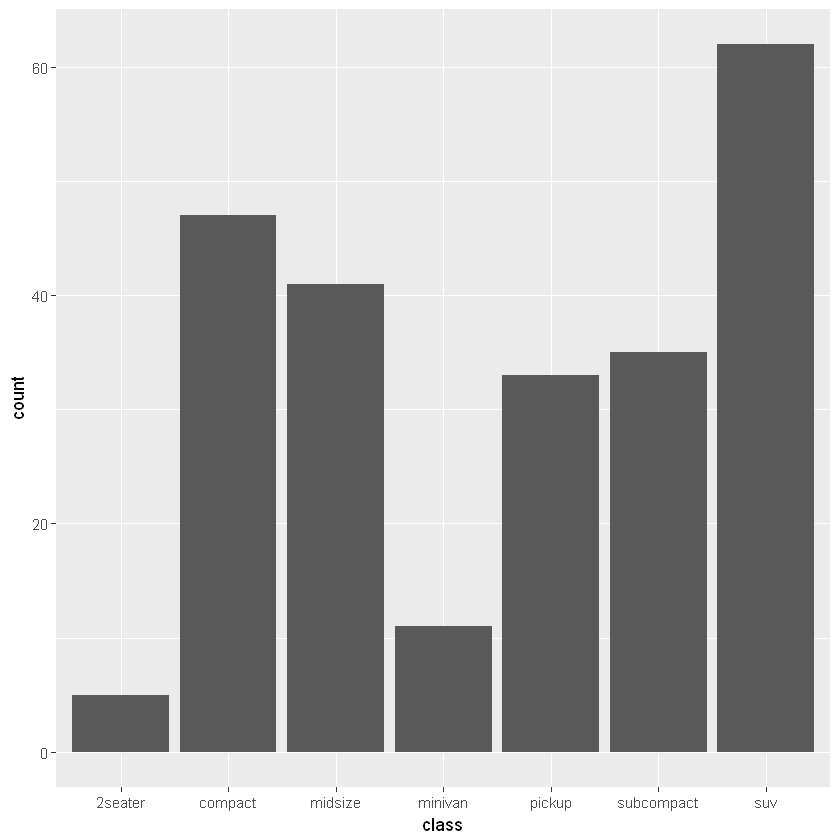

In [46]:
ggplot(data=mpg, mapping=aes(x=class)) + 
    geom_bar()

Firstly we'd like to have a point at the measured count of each class, at the top of the bar. We can do this with stats, similarly to what we did with stat_summary before. stat_summary gave us the mean value, which we don't need when looking at count. Instead of using stat_summary, then, quite simply we can use stat_count. 
Let's plot stat_count with red point geoms!

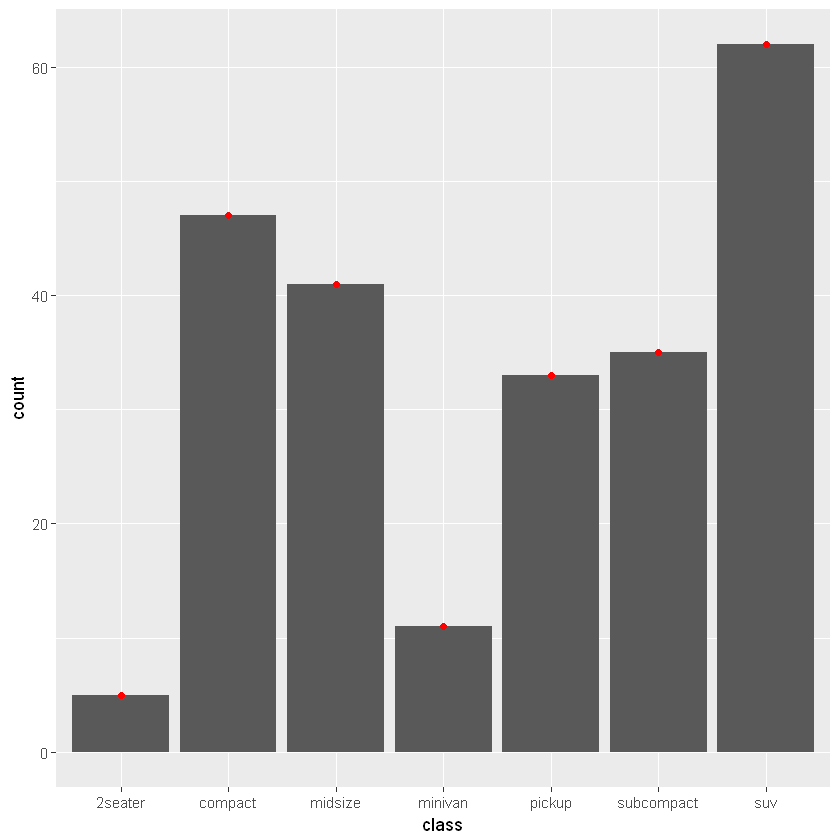

In [47]:
ggplot(data=mpg, mapping=aes(x=class)) + 
    geom_bar() +
    stat_count(color="red", geom="point")

Great! Now onto the actual error bars.

Note that since count doesn't have a standard deviation, you can really only work with hard values or percentages. For example, the error could be my a margin of 10% of the measured count - if we recorded 100 cars, the value can be between 90 to 110.

Before, we used an error bar geom with a 'summary' stat to show our error values.

This time, we'll use a 'count' stat.

This is great and all, but we still need to defind ymin and ymax for error bars! Since we determined that to be 10% from the count, it would be really nice if we could just write 90% of count as ymin and 110% of count as ymax.
Thankfully, we can! To get it, we should use the .. identifiers. Writing ..count.. will tell R to use the count of each car class.
With ..count.., it's easy to set ymin and ymax to whatever values we want.

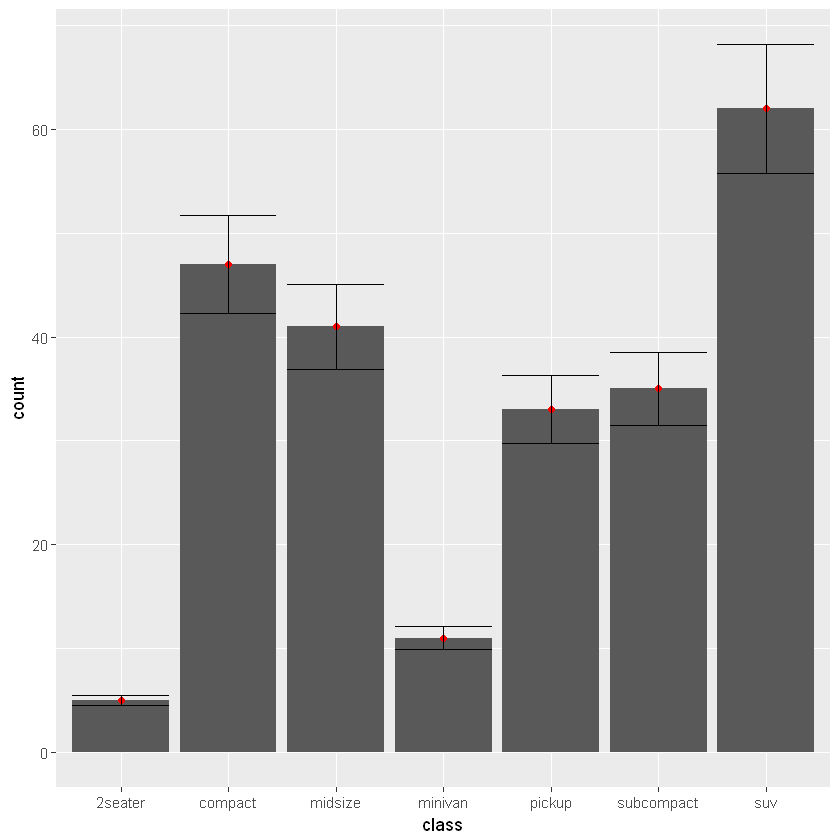

In [48]:
ggplot(data=mpg, mapping=aes(x=class)) + 
    geom_bar() +
    stat_count(color="red", geom="point")+
    geom_errorbar(aes(ymin = (..count.. * .9), ymax = ..count.. *1.1), , stat = 'count')

While aesthetics are useful, it might be even more useful to break a large plot into several smaller plots. We can do this by adding a facet, using facet_wrap().

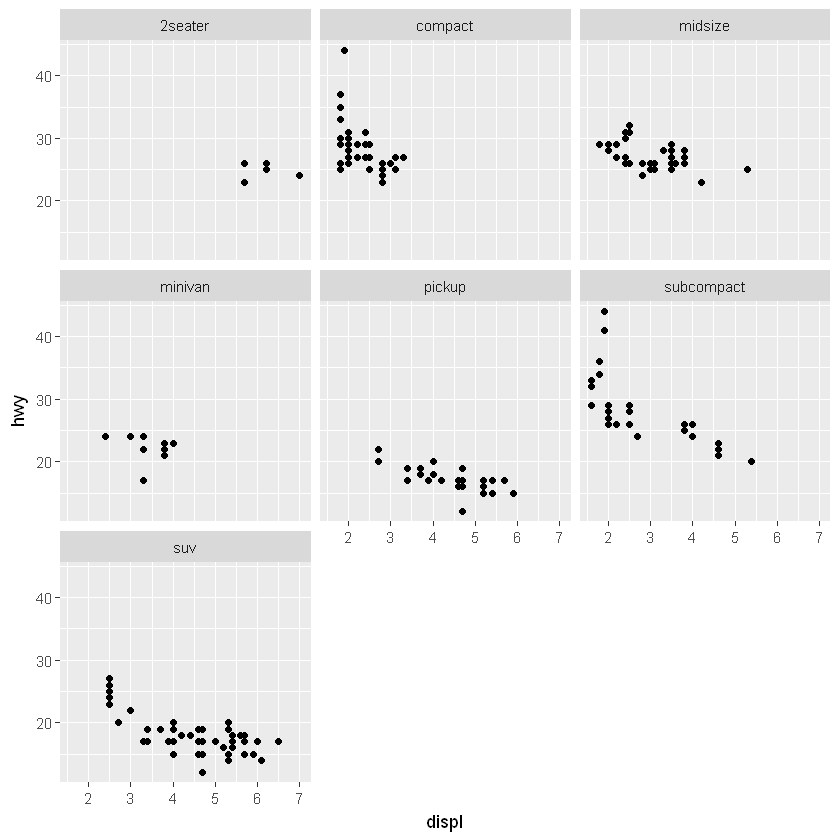

In [49]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
geom_point()+facet_wrap(~class)


This looks a bit cramped – we can adjust the number of rows and columns with nrow and ncol respectively.

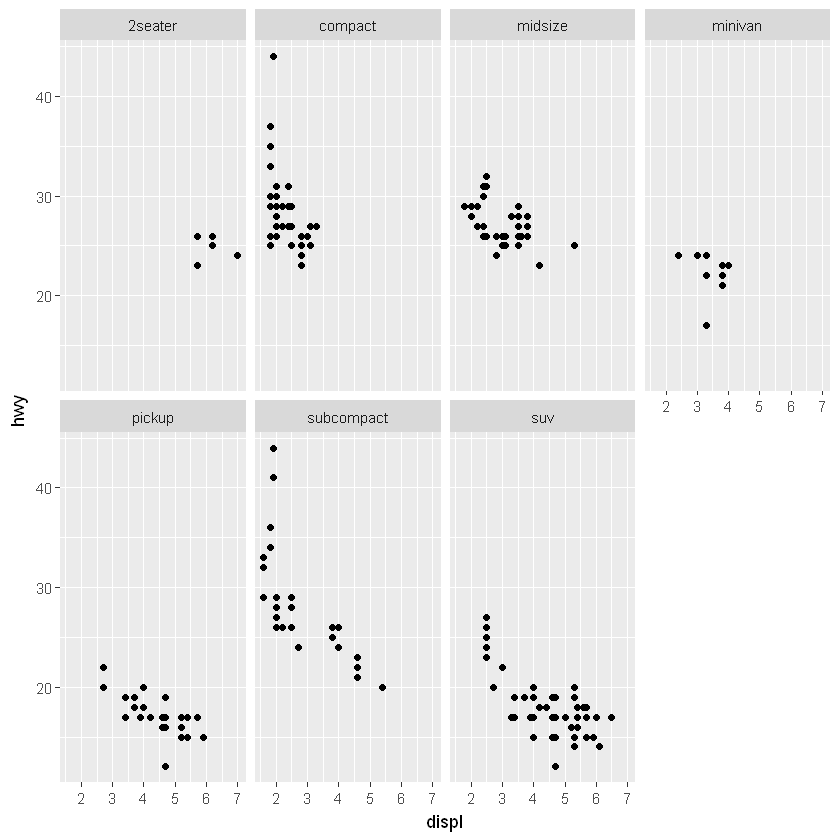

In [50]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
 geom_point()+facet_wrap(~class, nrow=2)


We can do this with more than one variable using facet_grid.

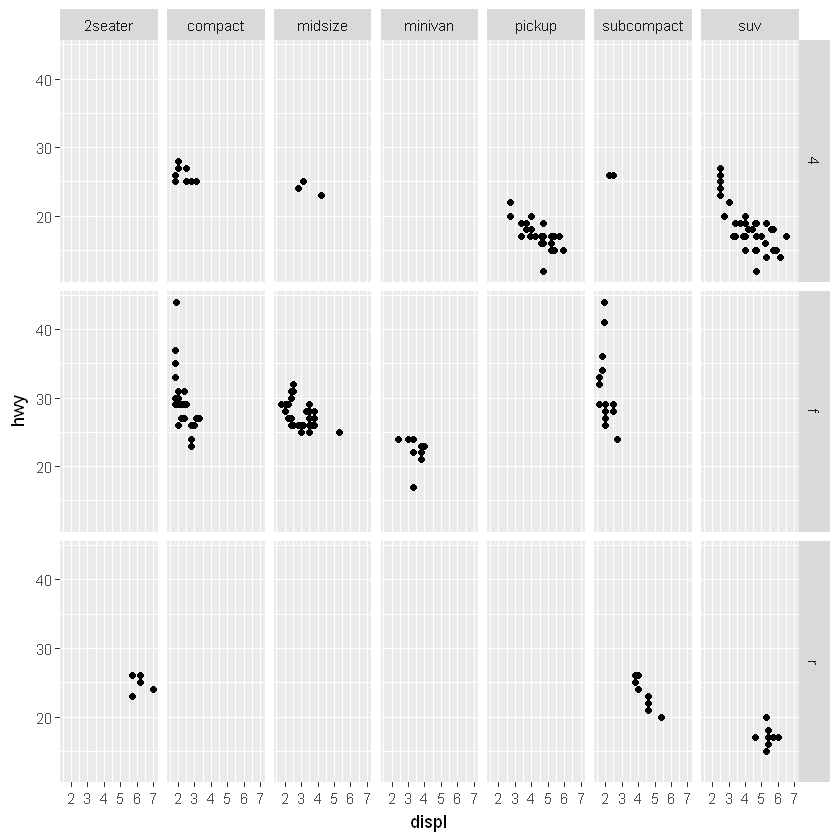

In [51]:
ggplot(data=mpg, mapping = aes(x=displ, y=hwy)) +
 geom_point()+facet_grid(drv~class)

It automatically makes the grid for you. With this data we can see that 2seater cars are rear-drive, and that the suvs and pickups tend to have the worst fuel efficiency.
Note that facets work well with discrete variables. They will not work well with continuous variables because that requires for each value to be mapped to a row or column.  

Let’s make a simple barplot with nothing on the x axis. To do this, pass in an empty string.

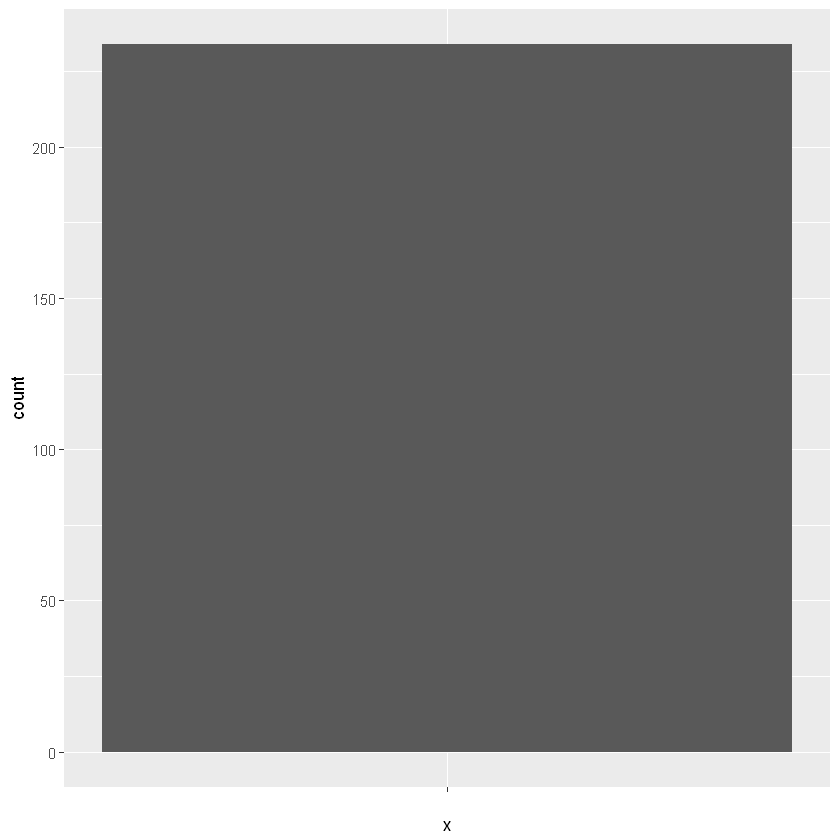

In [52]:
ggplot(data=mpg, mapping = aes(x="")) +
     geom_bar()

This doesn’t tell us anything interesting. Let’s map class to the fill aesthetic.

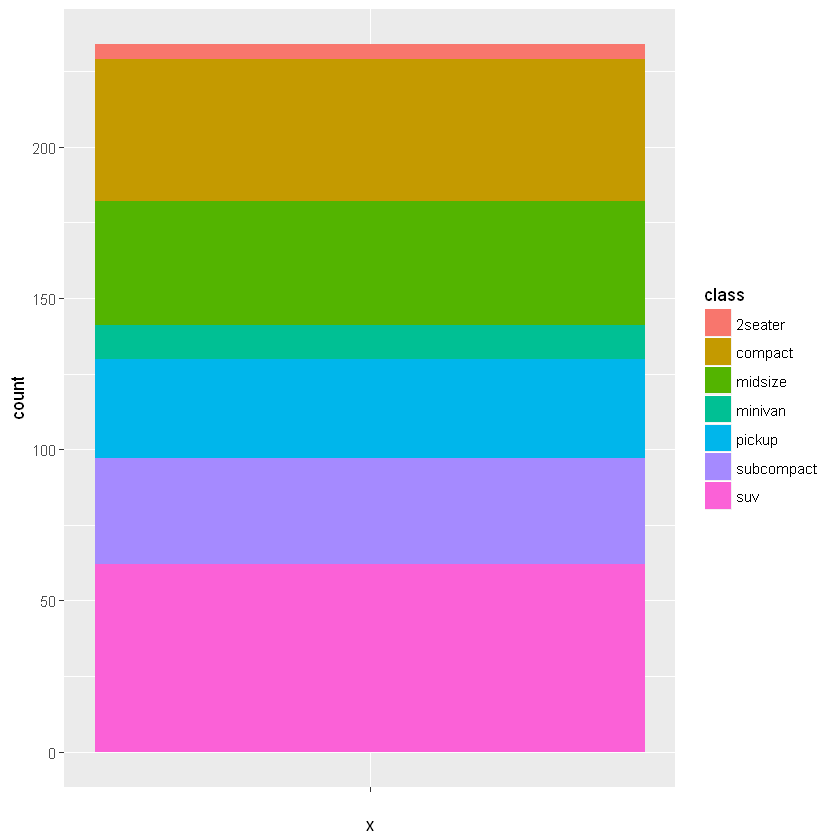

In [53]:
ggplot(data=mpg, mapping = aes(x="", fill=class)) +
     geom_bar()

It's getting tiring pasting out the ggplot() function over and over again. As a shortcut, we can simply store it as an object, just as we would a number or a letter!

In [54]:
myPlot<-ggplot(data=mpg, mapping = aes(x="", fill=class))

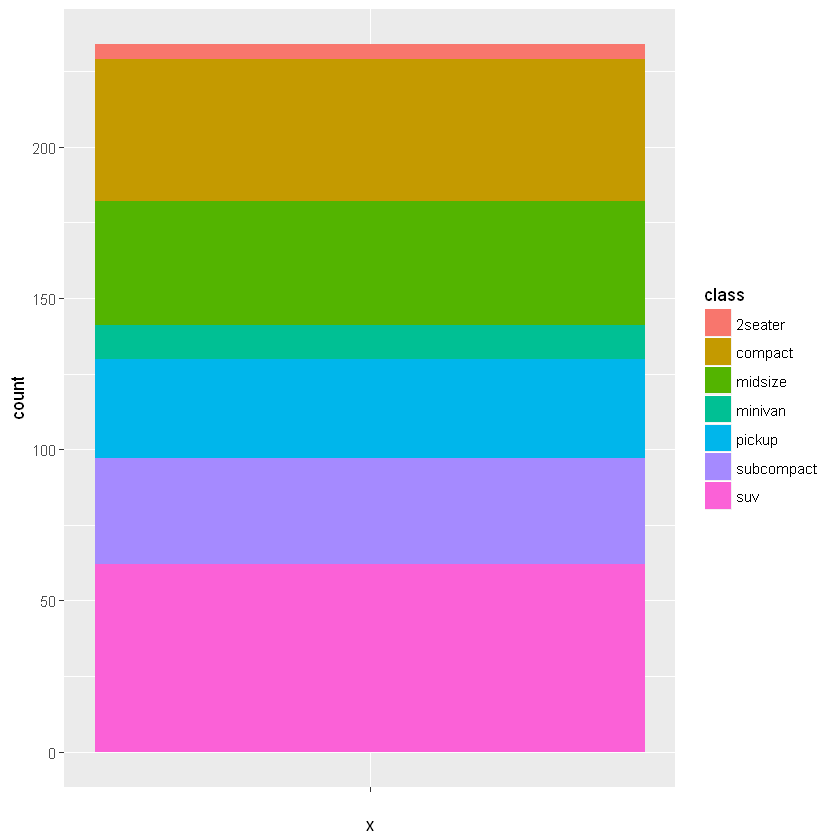

In [55]:
myPlot+
    geom_bar()

This is interesting and all, but wouldn’t it be better if there was a more appealing way to visualize the proportions?
Enter the pie chart!
You can project a bar plot onto polar coordinates by using coord_polar.

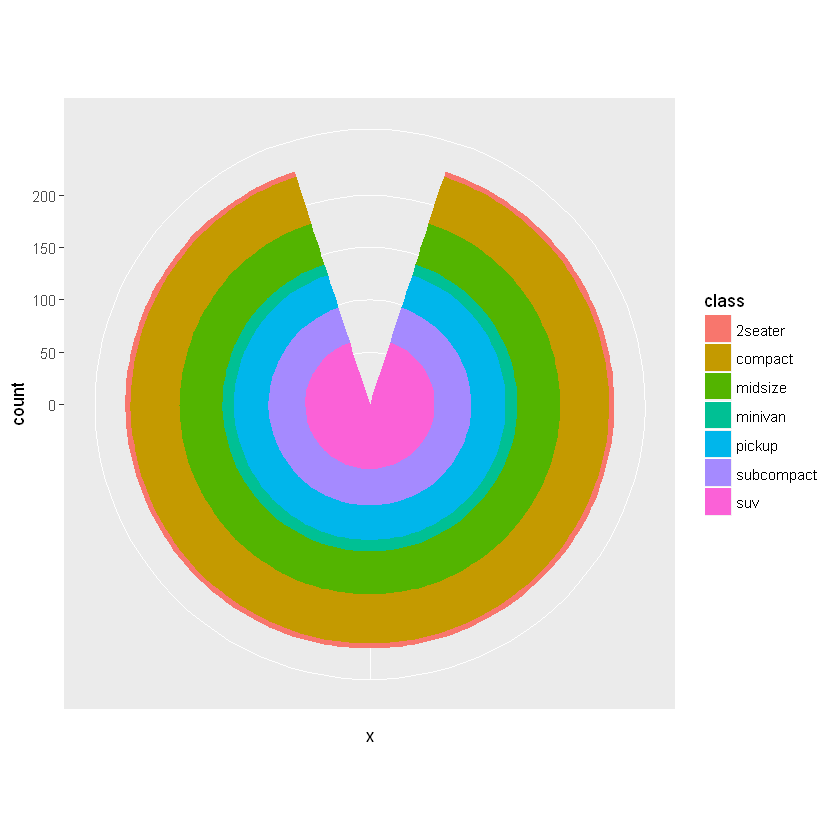

In [56]:
myPlot +
     geom_bar()+
     coord_polar()

Oh… that’s not a pie chart! That looks more like a bullseye chart. The problem is that the count is mapped to the thickness of the slice instead of the angle of the pie.
To fix this, map “y” (count) to the appropriate parameter. I won’t tell you what this parameter is – use the help function to investigate the parameters of coord_polar.

In [57]:
?coord_polar

theta	
variable to map angle to (x or y)

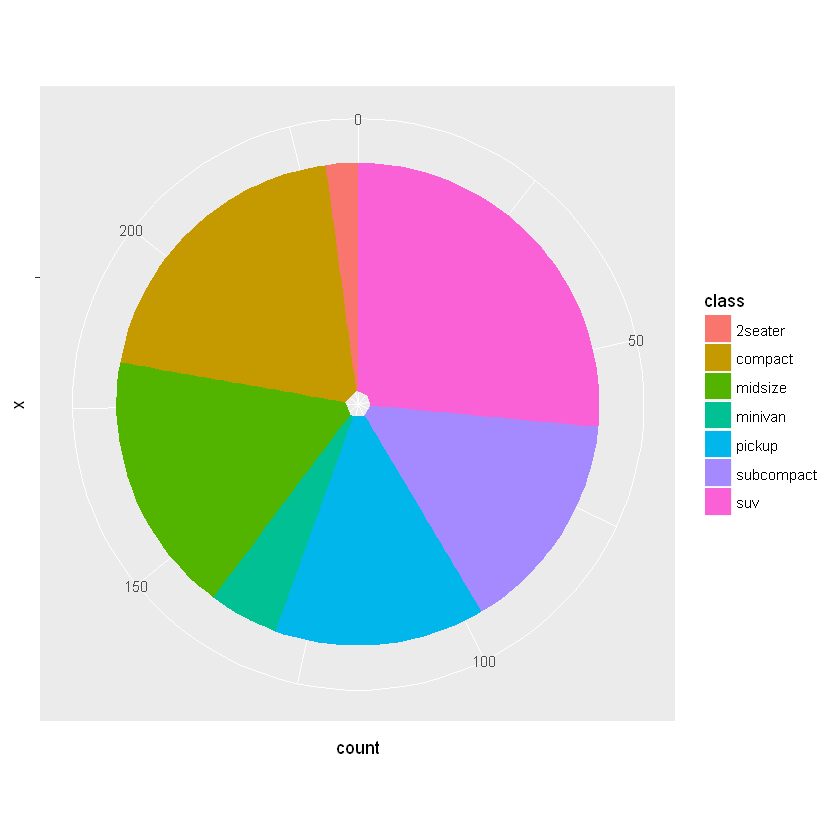

In [58]:
myPlot +
     geom_bar()+
     coord_polar(theta = "y")


We’re close – there’s just the issue of the small hole in the center.

Why is that the case? Use the up arrow to navigate to your bar plot.


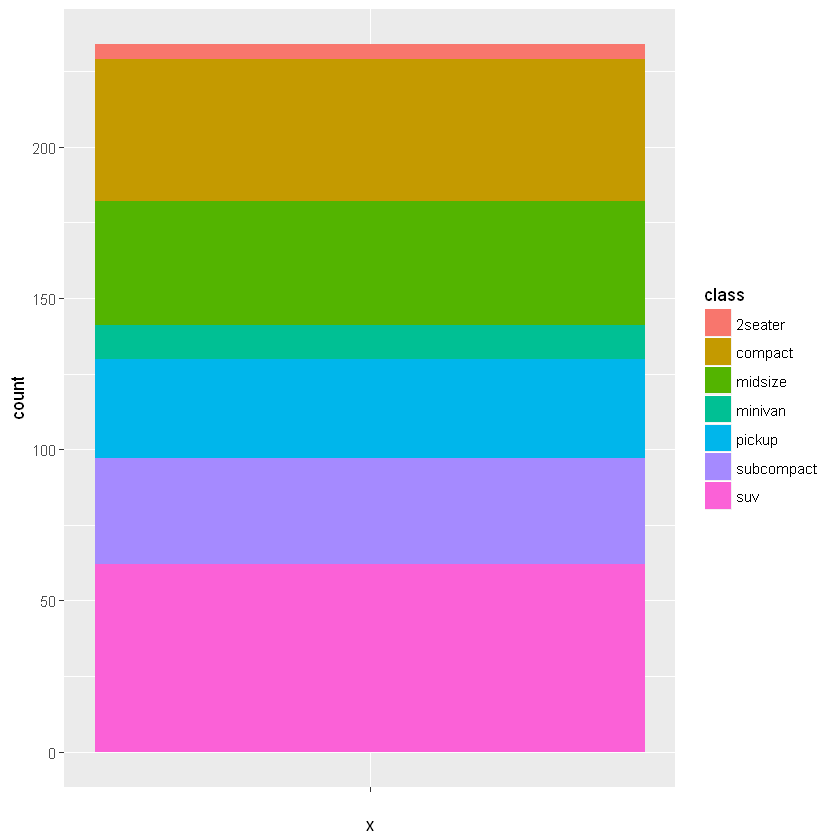

In [59]:
myPlot +
     geom_bar()

Notice how there is space on either side of the bar plot. This is because, by default, the width of the bar plot is set to 90%. This is also why our target plot had a ‘slice’ missing.
How would you change the width from 90% to 100%? Use the help function to investigate the geom_bar.


In [60]:
?geom_bar

width	
Bar width. By default, set to 90% of the resolution of the data.

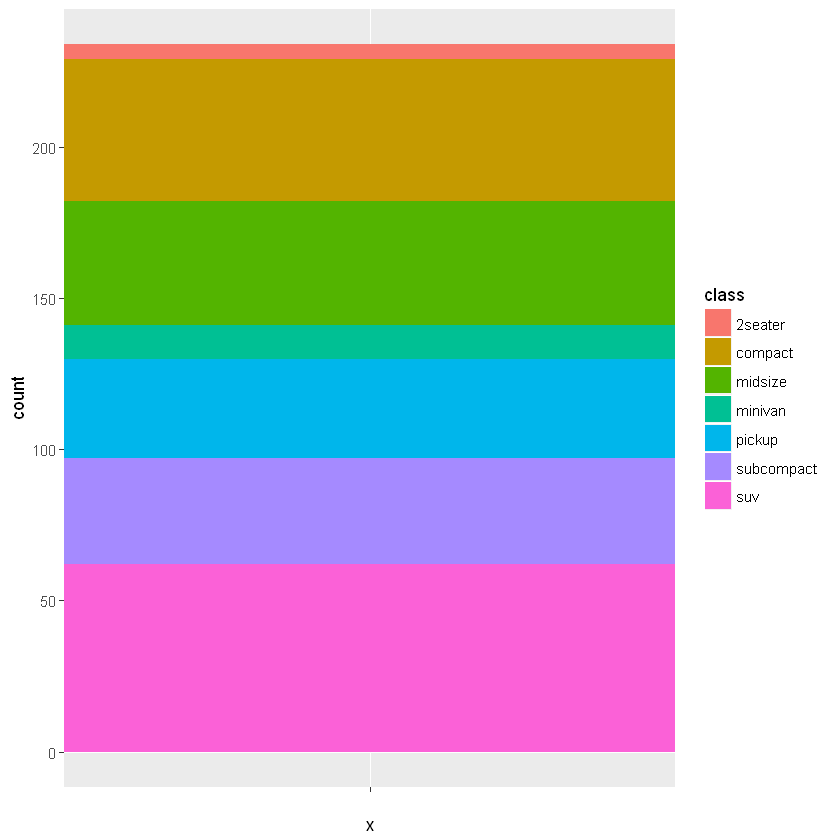

In [61]:
myPlot +
        geom_bar(width=1)


Excellent! Now, try adding in your coord_polar code.

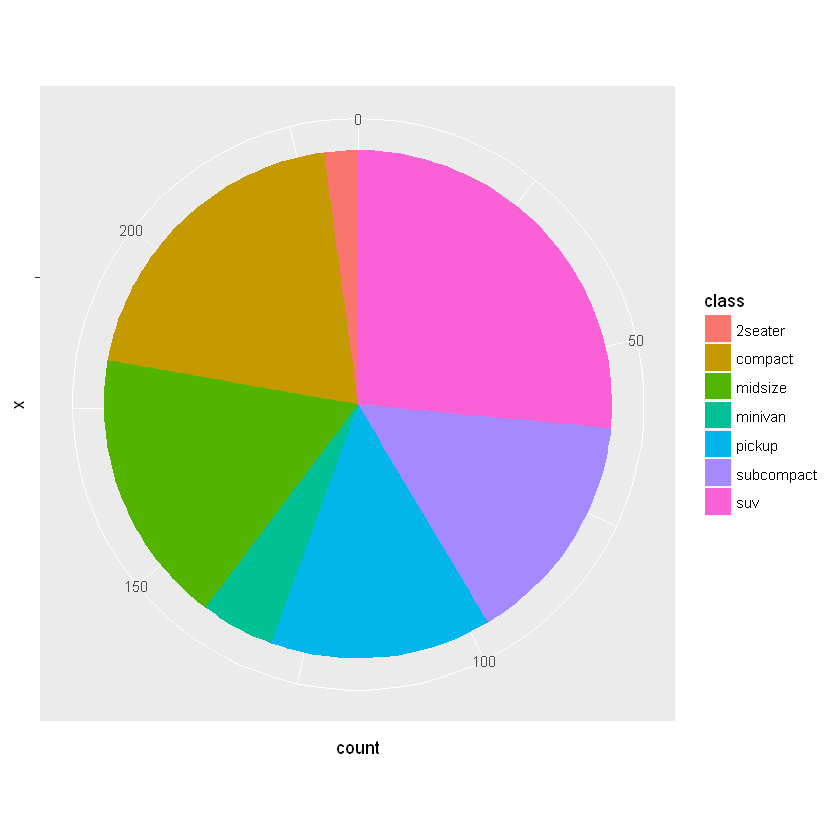

In [62]:
myPlot +
     geom_bar(width=1) +
     coord_polar(theta="y")

And here is our wonderful pie chart!

In addition to coord_polar, there are other coordinate transformations in R. You can use coord_cartesian to 'zoom in' on your graph, and coord_flip to flip the graph onto its side.

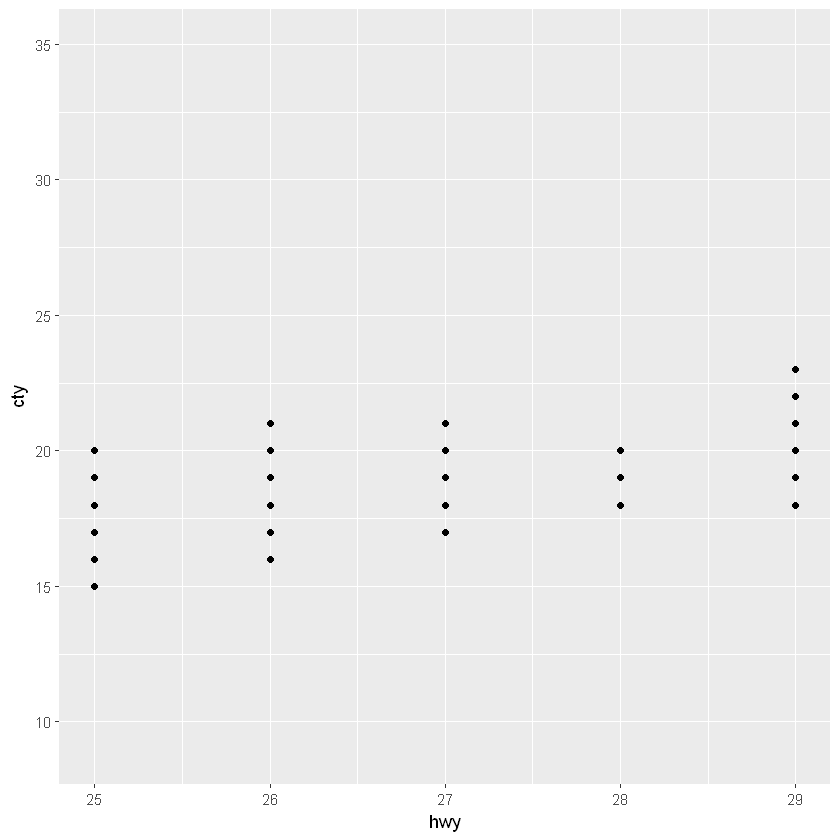

In [63]:
ggplot(data=mpg) + 
geom_point(mapping=aes(x=hwy, y=cty)) + 
coord_cartesian(xlim =c(25,29))

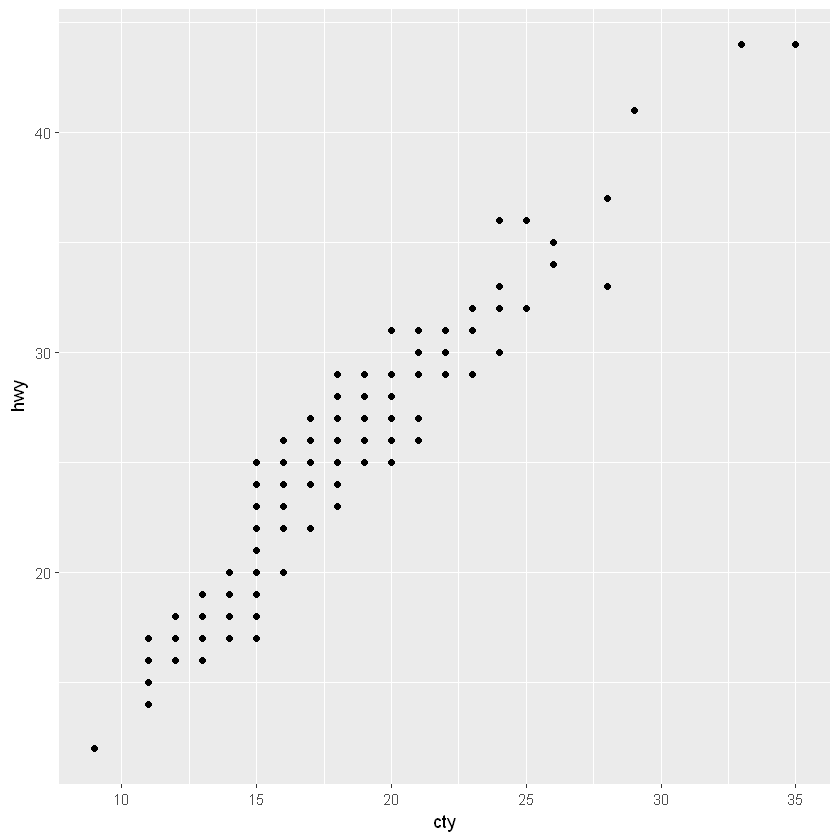

In [64]:
ggplot(data=mpg) + 
geom_point(mapping=aes(x=hwy, y=cty)) + 
coord_flip()

We can further customize our graphs.
Consider the following bar plot.

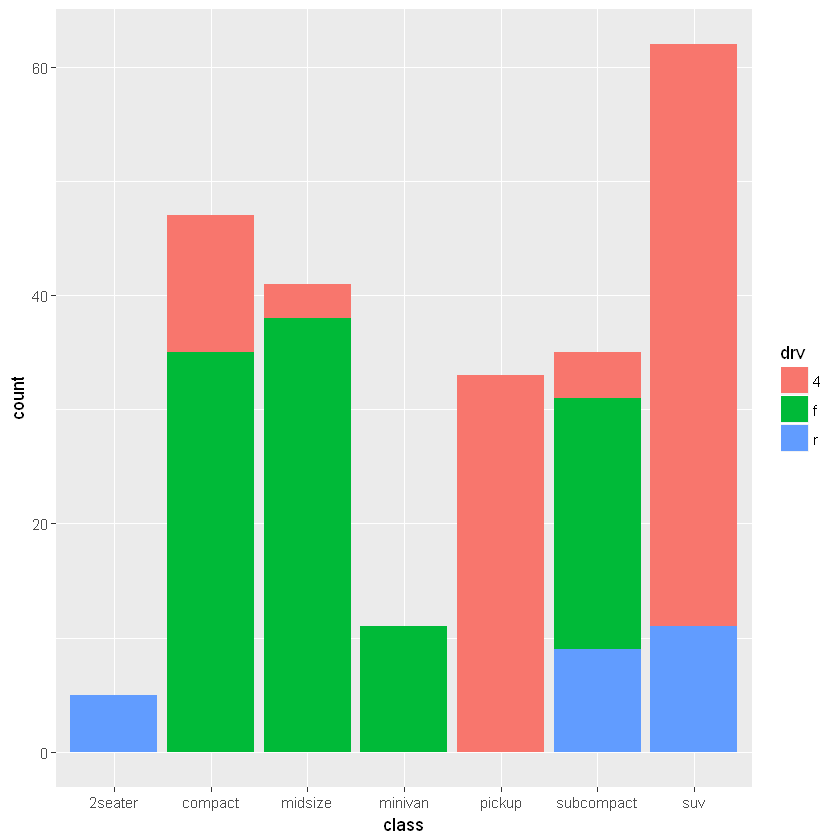

In [65]:
ggplot(data=mpg, mapping = aes(x=class)) +
        geom_bar(mapping=aes(fill=drv))


Using the labs() function, we can add a new x axis label, y axis label, caption, title, and subtitle.
Try it out now.
Use ?labs if you get stuck.

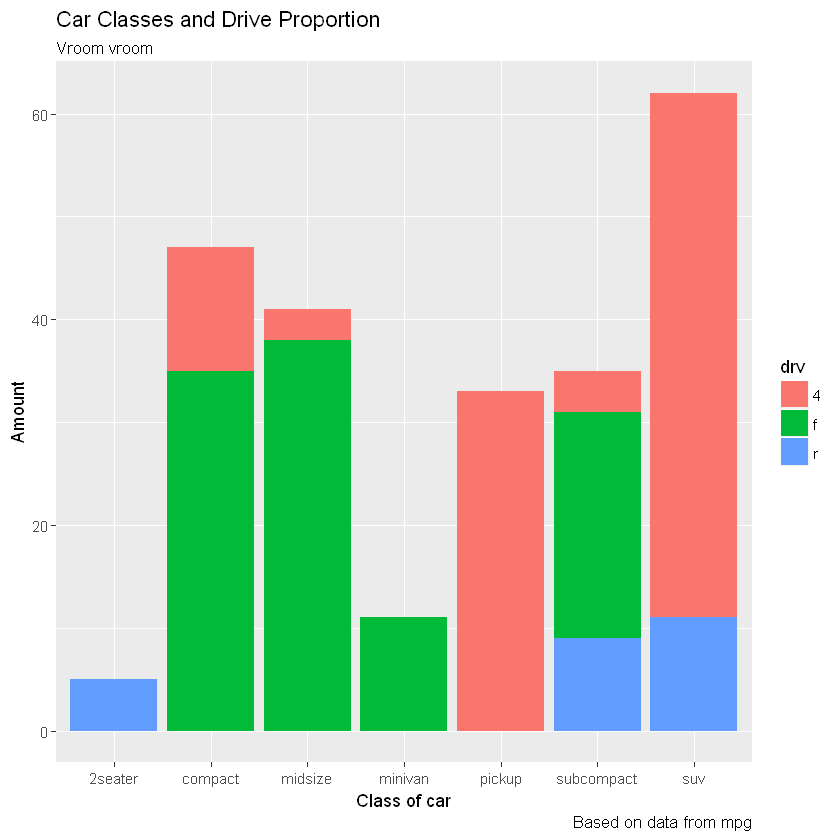

In [66]:
ggplot(data=mpg, mapping = aes(x=class)) +
        geom_bar(mapping=aes(fill=drv))+
        labs(x="Class of car", 
             y="Amount", 
             title="Car Classes and Drive Proportion", 
             subtitle="Vroom vroom", 
             caption="Based on data from mpg")

We might want to change the colours of the drv. Add the scale_fill_manual function and pass in a collective of the colours you want, either by name or by hex code (in strings, using c(…)) to the values parameter.

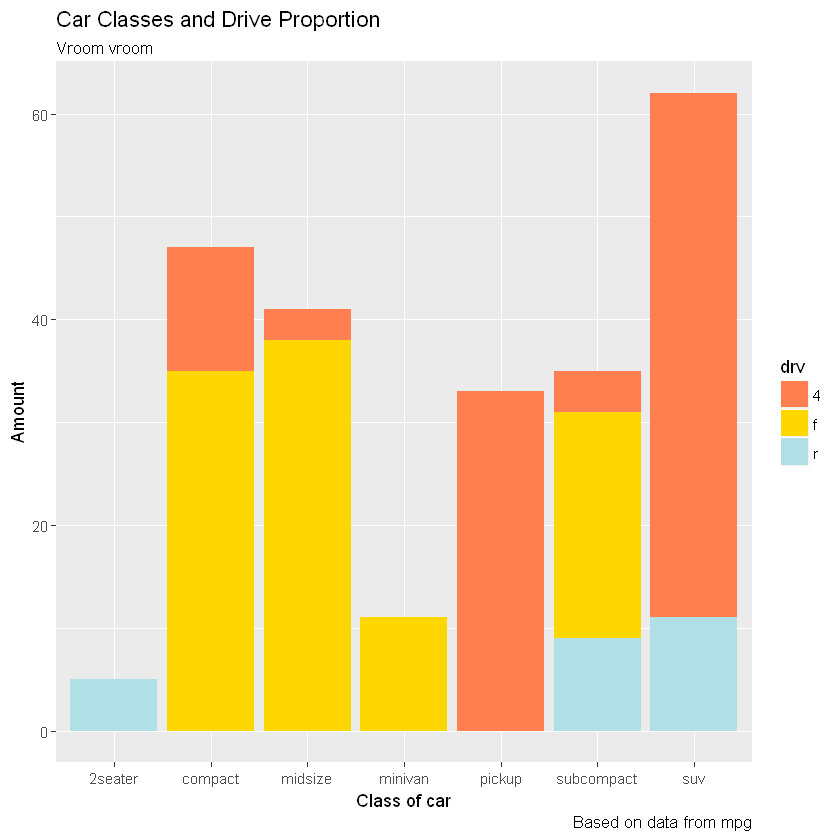

In [67]:
ggplot(data=mpg, mapping = aes(x=class)) +
       geom_bar(mapping=aes(fill=drv))+
       labs(x="Class of car", 
            y="Amount", 
            title="Car Classes and Drive Proportion", 
            subtitle="Vroom vroom", 
            caption="Based on data from mpg")+
            scale_fill_manual(values=c("coral","gold","powderblue"))


Another way to make our graphs a little more appealing is to use themes.

To add a theme to your plot, store the plot as an object and then add it on.

There are quite a few premade themes to choose from!

p + theme_gray() (the default)
p + theme_bw()
p + theme_linedraw()
p + theme_light()
p + theme_dark()
p + theme_minimal()
p + theme_classic()
p + theme_void()

Try them out and see which one you like the most!
I personally like dark here since it makes the colours pop more.

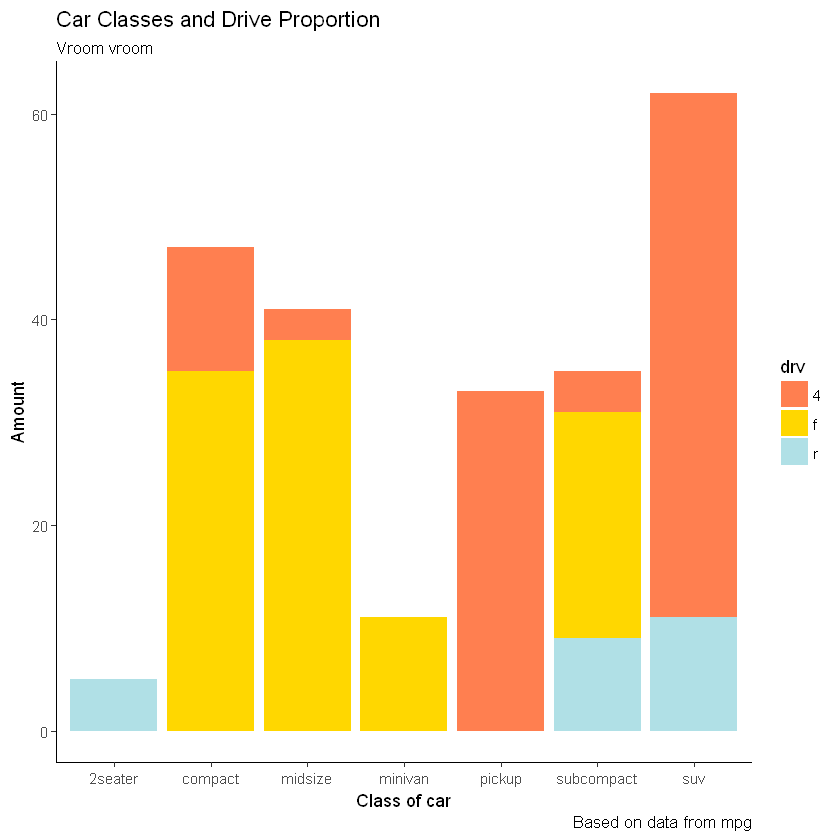

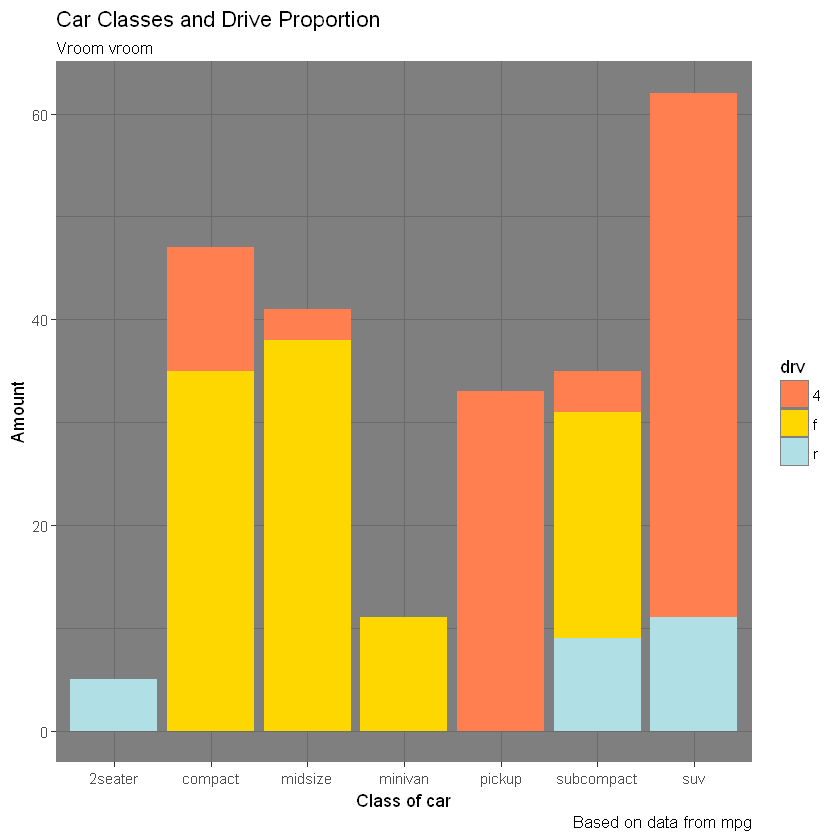

In [68]:
barPlot<-ggplot(data=mpg, mapping = aes(x=class)) +
       geom_bar(mapping=aes(fill=drv))+
       labs(x="Class of car", 
            y="Amount", 
            title="Car Classes and Drive Proportion", 
            subtitle="Vroom vroom", 
            caption="Based on data from mpg")+
            scale_fill_manual(values=c("coral","gold","powderblue"))

barPlot + theme_classic()
barPlot + theme_dark()

What else can we use to enhance our visualization of data?
We can, for example, plot a reference line with the abline geom. Try this on a jittered scatterplot with x being highway miles and y being city miles. Don’t forget to label your axes!


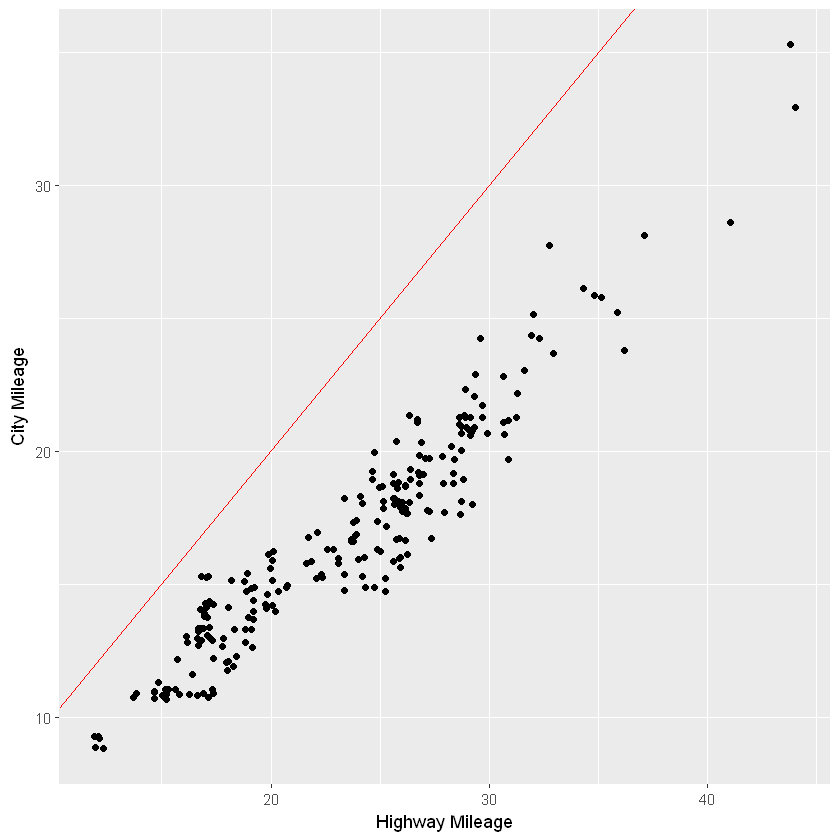

In [69]:
ggplot(data=mpg, mapping = aes(x=hwy, y=cty)) +
        geom_jitter() +
        geom_abline(color="red")+
        labs(x="Highway Mileage", y="City Mileage")


Try adding in coord_fixed to play with the aspect ratio (read the documentation!)
(Note - this is not really visible in the Jupyter notebooks)

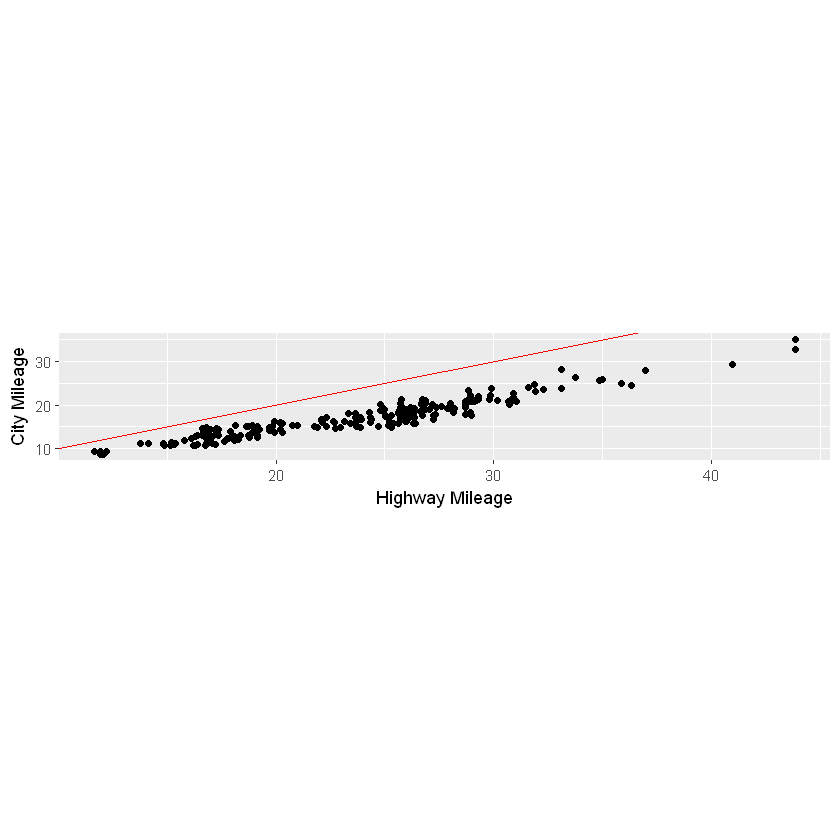

In [70]:
ggplot(data=mpg, mapping = aes(x=hwy, y=cty)) +
        geom_jitter() +
     geom_abline(color="red")+
     labs(x="Highway Mileage", y="City Mileage")+
     coord_fixed(1/5)


To change the scale of continuous x and y axes, use scale_x_continuous and scale_y_continuous.
Read the documentation, and tackle this task:
Make x logarithmic and appear on the upper side of the graph, while making y limited to show values in the 20-40 range.

Warning message:
"Removed 185 rows containing missing values (geom_point)."

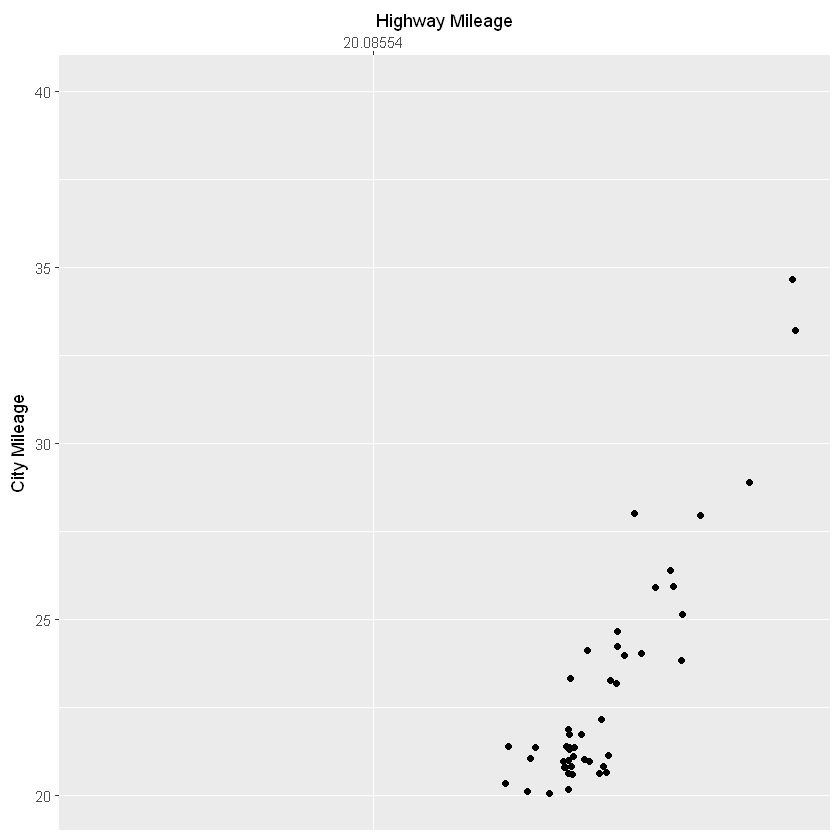

In [71]:
ggplot(data=mpg, mapping = aes(x=hwy, y=cty)) +
        geom_jitter() +
     geom_abline(color="red")+
     labs(x="Highway Mileage", y="City Mileage")+
     scale_x_continuous(trans = "log", position="top")+
     scale_y_continuous(limits=c(20,40))


As a bonus, you can also try naming you axes with the scale functions instead of the labs function.
Notice that the abline disappears from the logarithmically scaled plot. In this case it’s a better idea to use geom_smooth.
Also note that setting the scale of the chart gets rid of data. This is unlike coord_cartesian, which 'zooms' in on it without modifying the data.


## Spatial Data 

To learn how to plot things on a map, let’s use our data management and visualization skills to explore a new package: ggmap.
I’ll set a goal for us: 
**Our goal is to see, plotted on a map of Toronto, the largest downpours of rain each month avaiable in the dataset.**
We can start off by installing and loading the ggmap package.

ggmap is pretty close to ggplot2, aside from requiring a map object (which is actually a ggplot!). Remember to read the documentation for more information on parameters.

In [72]:
install.packages("ggmap", repos="https://cran.rstudio.com/")
library("ggmap")

Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Michal\AppData\Local\Temp\Rtmp86eyoM\downloaded_packages


Warning message:
"package 'ggmap' was built under R version 3.4.2"

Next, we have to import the data we want to use. We can do this using RCurl by passing in urls to the location of the datasets.

A convenient way to do this is by putting them all in a list for later.

To use urls, you must pass in a link to the raw csv data. All the datasets are located here:

https://github.com/bigdatachallenge/bdc_workshops/tree/master/2017_rainfall_data

From there on in you can click on one of them and press 'View Raw' or 'Raw' to get the link to the raw file.

Here are a few links to the measurements data:

https://raw.githubusercontent.com/bigdatachallenge/bdc_workshops/master/2017_rainfall_data/rainfall201701.csv

https://raw.githubusercontent.com/bigdatachallenge/bdc_workshops/master/2017_rainfall_data/rainfall201702.csv

And for the geographical data:

https://raw.githubusercontent.com/bigdatachallenge/bdc_workshops/master/2017_rainfall_data/sites201701.csv

https://raw.githubusercontent.com/bigdatachallenge/bdc_workshops/master/2017_rainfall_data/sites201702.csv

Hmm... there seems to be a pattern with the URLs! We can take advantage of this and write a short script to loop through the six measurements datasets and the six geographical datasets and put them into their own lists.

In [73]:
install.packages("RCurl", repos="https://cran.rstudio.com/")
library("RCurl")

rainfall_url <- 'https://raw.githubusercontent.com/bigdatachallenge/bdc_workshops/master/2017_rainfall_data/rainfall20170'
sites_url <- 'https://raw.githubusercontent.com/bigdatachallenge/bdc_workshops/master/2017_rainfall_data/sites20170'
sites <- list()
rainfall <- list()

for (i in c(1:6)) {
    url1 <- paste(rainfall_url, as.character(i), '.csv', sep = '')
    url2 <- paste(sites_url, as.character(i), '.csv', sep = '')
    rainfall[[i]] <- read.csv(text = getURL(url1))
    sites[[i]] <- read.csv(text = getURL(url2))
}


Installing package into 'C:/Users/Michal/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'RCurl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Michal\AppData\Local\Temp\Rtmp86eyoM\downloaded_packages


Loading required package: bitops

Attaching package: 'RCurl'

The following object is masked from 'package:tidyr':

    complete



We now have two new lists! rainfall contains six datasets and sites contains six datasets.
To make them into two big datasets, we can use rbind.

In [74]:
geoData<-do.call("rbind", sites)
measureData<-do.call("rbind", rainfall)

Let's view these and investigate the data.

In [75]:
head(geoData)
head(measureData)

id,name,longitude,latitude
7677,RG_001,-79.47811,43.64768
7678,RG_002,-79.44362,43.65120
7679,RG_003,-79.40509,43.65662
7680,RG_004,-79.40283,43.67834
7681,RG_006,-79.37510,43.66127
7682,RG_007,-79.33114,43.67672


id,name,date,rainfall
7687,RG_016,2017-01-01T00:00:00,0
7687,RG_016,2017-01-01T00:05:00,0
7687,RG_016,2017-01-01T00:10:00,0
7687,RG_016,2017-01-01T00:15:00,0
7687,RG_016,2017-01-01T00:20:00,0
7687,RG_016,2017-01-01T00:25:00,0


Immediately we notice it appears that each id has a coordinate associated with it. This will make mapping easier as we only have to map as many points as there are ids.
We see also that ‘name’ and id are tied to each other. We can confirm this by looking at their unique values.

In [76]:
length(unique(geoData$id))-length(unique(geoData$name))

[1] 0

Since this equals 0, we know they are the same length.
So we can probably connect the datasets by their id.
Before we do this, though, we should make measureData more manageable. Right now it has almost 2 million rows! Doing any operation on it would take a long time.
Let’s see how we can manage it by looking at the goal again. 
**Our goal is to see, plotted on a map of Toronto, the largest downpours of rain each month avaiable in the dataset.**
Since the data is categorized by the minute, we want to take each month and look for the maximum rainfall that occurred during it.
Let’s transform the dates variables to numbers representing month.


In [77]:
measureData$date<-format(as.Date(measureData$date),"%m")

Now, we can look at each month and find the maximum rainfall for it. We can do this using aggregate.

In [78]:
measureData<-aggregate(rainfall~date+id, measureData, max)

Note that the resultant dataframe is missing some values for certain months for some ids. Don’t worry – this is simply missing data, present in the original dataframe too.

Now that this dataframe is a lot more manageable, we can map the coordinates to it from the other dataset.
We can do this with merge.


In [79]:
finalData<-merge(measureData, geoData, by="id")

We can clean it up a little more from here: for example, we don’t need ‘name’, since we already have id. For me, name is the fourth column, so I’ll get rid of that.

In [80]:
finalData<-finalData[-4]

Now, finally, we are ready to map!
In order to do this, we should first get a map of Toronto. 
Read the documentation on get_map.
Since we don’t know the exact longitude and latitude of Toronto, we can set the longitude as the mean longitude of all the points. We can do a similar thing to the latitude.
Setting zoom to 10 is typical for cities, and for our maptype, we could set it to terrain.

In [81]:
myMap <- get_map(location = c(lon = mean(finalData$longitude), 
                              lat = mean(finalData$latitude)), 
                                 zoom = 10, maptype = "terrain")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=43.719433,-79.415851&zoom=10&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false


Maps are ggplot objects that are used by ggmap. Try showing your map right now by passing it into ggmap, like you would a plot into ggplot.

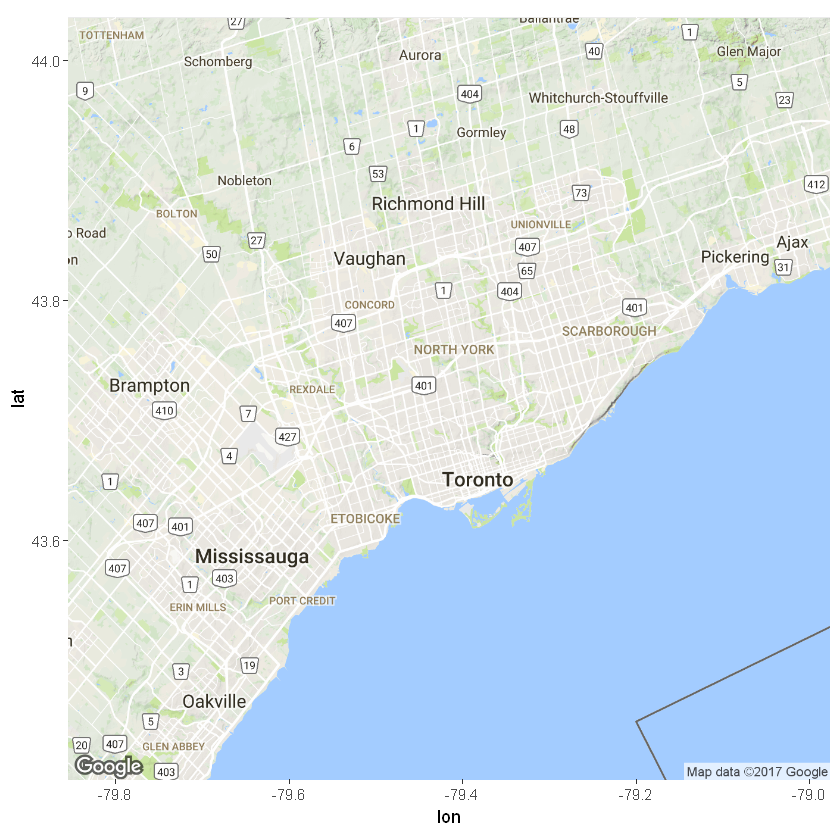

In [82]:
ggmap(myMap)

Yay! It’s Toronto!
To plot our data onto it, we simply use the point geom! Give it a try. Remember to supply it with data.


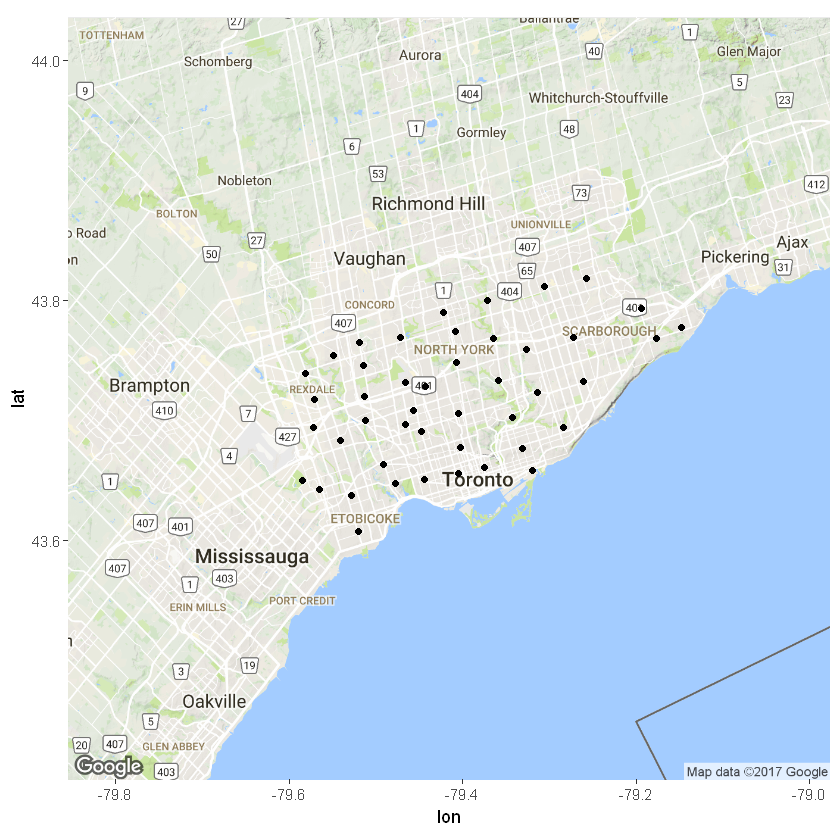

In [83]:
ggmap(myMap) +
     geom_point(data=finalData, mapping=aes(x=longitude, y=latitude))


You can visualize the maximum rainfall using size or colour (or both!)

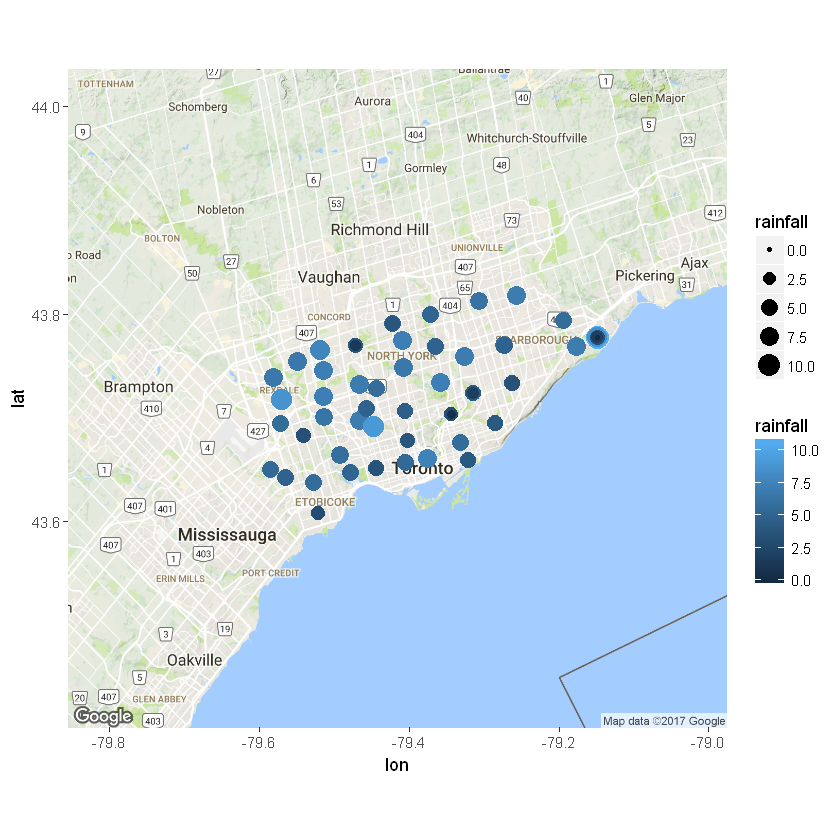

In [84]:
ggmap(myMap) +
     geom_point(data=finalData, mapping=aes(x=longitude, y=latitude, colour=rainfall, size=rainfall))


The problem with this is that the points are plotted on top of one another, so there’s no distinct separation between the months. This is an easy fix using our old friend: facets!

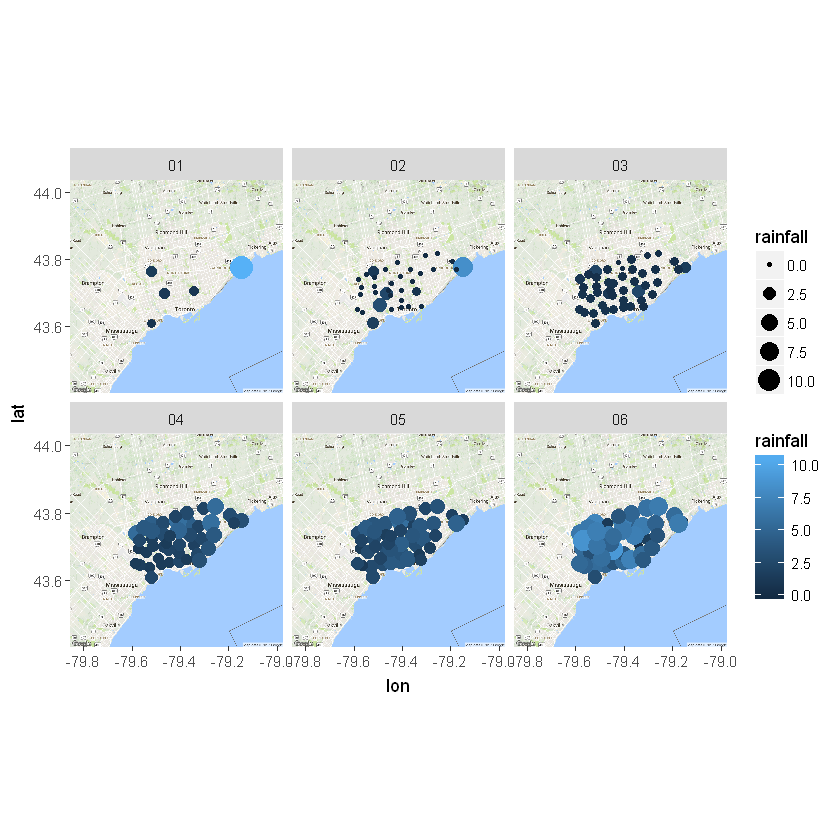

In [85]:
ggmap(myMap) +
     geom_point(data=finalData, mapping=aes(x=longitude, y=latitude, colour=rainfall, size=rainfall))+
     facet_wrap(~date)


We can make the facet labels prettier using the labler parameter and function.
In order to do that we first have to make a named vector to pass into the labeler function. Assign each number in the dataset (using “ since they should be treated as characters!) their corresponding month’s name.


In [86]:
month_names<-c("01"="January", "02"="February", "03"="March", "04"="April", "05"="May", "06"="June")

Read how to use the labler function. Then, assign this to the date variable, pass that into the labler function, and pass that into the labler parameter in the facet function.

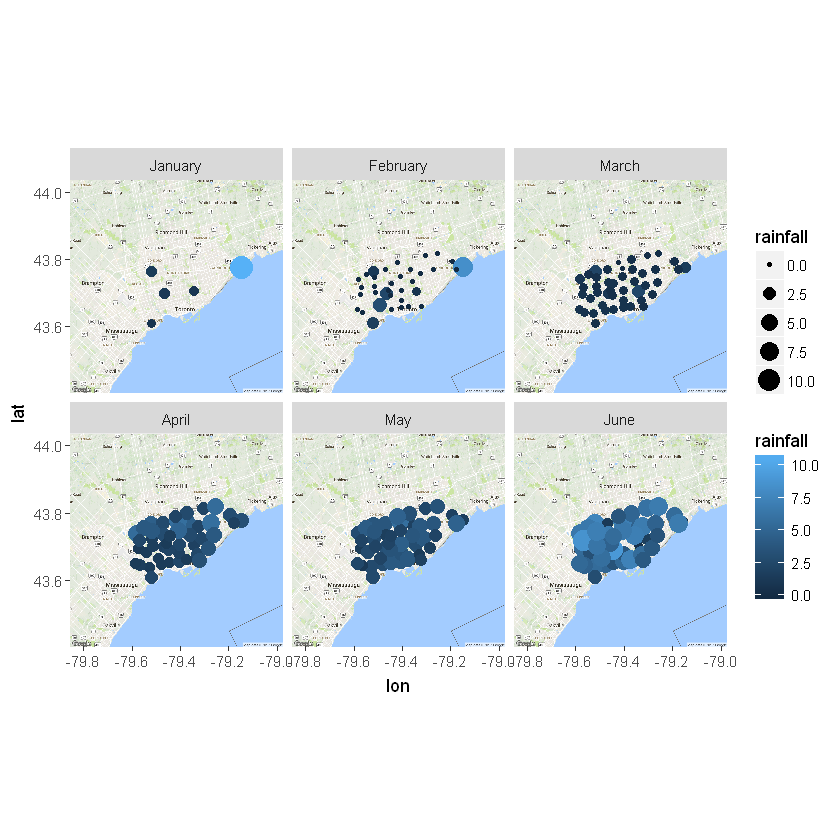

In [87]:
ggmap(myMap)+
    geom_point(data=finalData, mapping=aes(x=longitude, y=latitude, colour=rainfall, size=rainfall))+
     facet_wrap(~date, labeller=labeller(date=month_names))


To add the finishing touches, you can use labs() to modify the labels of the x and y axes, as well as the legends! For example, to get rid of the title on rainfall, you can set the label of colour to an empty string.

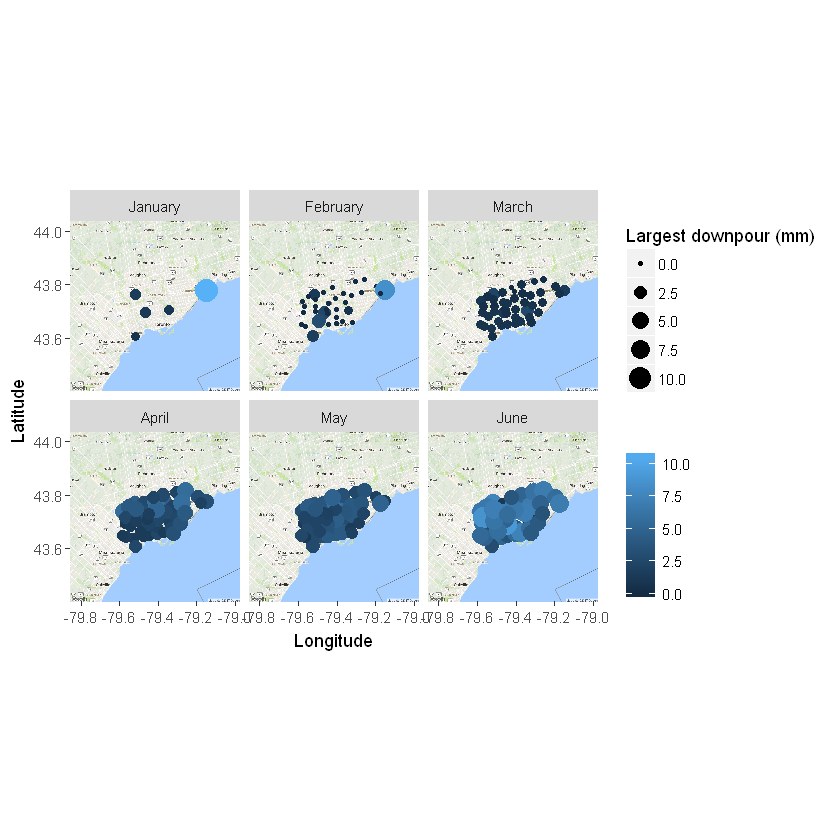

In [88]:
ggmap(myMap) +
     geom_point(data=finalData, mapping=aes(x=longitude, y=latitude, colour=rainfall, size=rainfall))+
     facet_wrap(~date, labeller=labeller(date=month_names))+
     labs(x="Longitude", y="Latitude", size="Largest downpour (mm)", colour="")


And there you have it!

As you may note, much more time is spent cleaning the data and thinking about the way you want it formatted than the actually visualization. This is because properly arranging the data can make the visualization much easier.
